<a href="https://colab.research.google.com/github/ingcarlosalazar/Analisis-de-datos/blob/main/worldQS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
project_path = '/content/drive/My Drive/Investigacion UG - more Data/'

In [ ]:
# leer dataset xlsx
df_original = pd.read_excel(project_path+'QS.xlsx', sheet_name='Hoja1')
print(df_original.shape)
df_original.head()

(25623, 13)


year         categoria    subject Rank  \
0  2014  Natural Sciences  Chemistry    1   
1  2014  Natural Sciences  Chemistry    2   
2  2014  Natural Sciences  Chemistry    3   
3  2014  Natural Sciences  Chemistry    4   
4  2014  Natural Sciences  Chemistry    5   

                                University_Name       City         Country  \
0  Massachusetts Institute of Technology (MIT)   Cambridge   United States   
1      University of California. Berkeley (UCB)   Berkeley   United States   
2                       University of Cambridge  Cambridge  United Kingdom   
3                            Harvard University  Cambridge   United States   
4                           Stanford University   Stanford   United States   

   Overall_score  Academic Reputation  Employer Reputation  \
0           96.8                100.0                962.0   
1           96.0                971.0                898.0   
2           94.0                996.0                100.0   
3           92.9                 98.0                978.0   
4           92.1                 92.0                916.0   

   Citations per Paper  H-index Citations  International Research Network  
0                919.0               96.0                             NaN  
1                965.0              994.0                             NaN  
2                 86.0               85.0                             NaN  
3                891.0              818.0                             NaN  
4                925.0              922.0                             NaN

# Preprocesamiento

## Analizando Datos Nulos

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25623 entries, 0 to 25622
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            25623 non-null  int64  
 1   categoria                       25623 non-null  object 
 2   subject                         25623 non-null  object 
 3   Rank                            25623 non-null  object 
 4   University_Name                 25617 non-null  object 
 5   City                            25470 non-null  object 
 6   Country                         25523 non-null  object 
 7   Overall_score                   4929 non-null   float64
 8   Academic Reputation             23237 non-null  float64
 9   Employer Reputation             23277 non-null  float64
 10  Citations per Paper             23434 non-null  float64
 11  H-index Citations               23342 non-null  float64
 12  International Research Network  

In [ ]:
# De la columna Overall_score convierte los valores "n/a" en nulos

df_original['Overall_score'].replace("n/a", np.nan, inplace=True)

In [ ]:
print("Número de registros:", df_original.shape[0], end="\n\n")
(df_original.iloc[:, 7:]==0).sum()

Número de registros: 25623



Overall_score                      0
Academic Reputation                0
Employer Reputation               43
Citations per Paper                1
H-index Citations                  0
International Research Network     0
dtype: int64

In [ ]:
print("Número de registros:", df_original.shape[0], end="\n\n")
df_original.iloc[:, 7:].isna().sum()

Número de registros: 25623



Overall_score                     20694
Academic Reputation                2386
Employer Reputation                2346
Citations per Paper                2189
H-index Citations                  2281
International Research Network    22251
dtype: int64

In [ ]:
print("Número de registros sin nulos en 'Overall_score':", df_original.dropna(subset="Overall_score").shape[0], end="\n\n")
df_original.dropna(subset="Overall_score").isna().sum()

Número de registros sin nulos en 'Overall_score': 4929



year                                 0
categoria                            0
subject                              0
Rank                                 0
University_Name                      2
City                                26
Country                             10
Overall_score                        0
Academic Reputation                  0
Employer Reputation                  0
Citations per Paper                  0
H-index Citations                    0
International Research Network    4125
dtype: int64

In [ ]:
# ¿Qué valores tiene la columna 'International Research Network'?
np.unique(df_original.dropna(subset="Overall_score")['International Research Network'])

array([ 29.2,  30.7,  32. ,  32.5,  33.7,  34.2,  34.9,  35.3,  36.1,
        37.2,  37.7,  38.6,  40. ,  40.9,  41.5,  42.1,  42.2,  42.8,
        43. ,  43.1,  43.4,  43.9,  44. ,  44.2,  44.3,  44.5,  45. ,
        45.1,  45.2,  45.5,  46.1,  46.8,  46.9,  47. ,  47.3,  47.4,
        47.7,  48.1,  48.3,  48.4,  48.8,  48.9,  49.2,  49.3,  49.4,
        49.5,  49.8,  49.9,  50. ,  50.2,  50.4,  50.8,  50.9,  51. ,
        51.2,  51.3,  51.4,  51.5,  51.7,  51.8,  52. ,  52.1,  52.2,
        52.3,  52.7,  53. ,  53.2,  53.4,  53.5,  53.6,  53.7,  53.9,
        54.1,  54.3,  54.4,  54.6,  54.7,  54.8,  54.9,  55.1,  55.2,
        55.3,  55.4,  55.5,  55.6,  55.7,  55.8,  55.9,  56. ,  56.1,
        56.2,  56.4,  56.5,  56.6,  56.7,  56.8,  57. ,  57.1,  57.2,
        57.3,  57.4,  57.5,  57.6,  57.8,  57.9,  58. ,  58.1,  58.2,
        58.3,  58.5,  58.6,  58.7,  59. ,  59.1,  59.4,  59.5,  59.6,
        59.7,  59.8,  59.9,  60. ,  60.1,  60.2,  60.3,  60.4,  60.5,
        60.6,  60.7,

In [ ]:
#@title Tratamiento de Datos Nulos
df = df_original.dropna(subset="Overall_score")

df["IRN_isna"] = df_original['International Research Network'].isna().astype(int, copy=True)

df.loc[:, 'International Research Network'].fillna(0, inplace=True)

print("Número de registros:", df.shape[0], end="\n\n")
print("\tNulos")
print(df.iloc[:, 7:].isna().sum())
print("\n\tCeros")
print((df.iloc[:, 7:]==0).sum(), end="\n\n")

Número de registros: 4929

	Nulos
Overall_score                     0
Academic Reputation               0
Employer Reputation               0
Citations per Paper               0
H-index Citations                 0
International Research Network    0
IRN_isna                          0
dtype: int64

	Ceros
Overall_score                        0
Academic Reputation                  0
Employer Reputation                  1
Citations per Paper                  0
H-index Citations                    0
International Research Network    4125
IRN_isna                           804
dtype: int64



<ipython-input-11-ba982ef54466>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IRN_isna"] = df_original['International Research Network'].isna().astype(int, copy=True)
<ipython-input-11-ba982ef54466>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'International Research Network'].fillna(0, inplace=True)


In [ ]:
df.reset_index(inplace=True, drop=True)

## Igualamos cantidad de data a la de shanghai


In [ ]:
# Cantidad de Registros por Institución

df_contingencia = pd.crosstab([df.University_Name], [df.year],
                              rownames=["Universidades"],
                              colnames=["Años"]
                             )
print("Cantidad de Instituciones: ", df_contingencia.shape[0], end="\n\n")
print("Instituciones con data de 5 años:", (df_contingencia.sum(axis=1)==5).sum())
print("Instituciones con data de 4 años:", (df_contingencia.sum(axis=1)==4).sum())
print("Instituciones con data de 3 años:", (df_contingencia.sum(axis=1)==3).sum())
print("Instituciones con data de 2 años:", (df_contingencia.sum(axis=1)==2).sum())
print("Instituciones con data de 1 año: ", (df_contingencia.sum(axis=1)==1).sum())
print("Instituciones con data de 0 años:", (df_contingencia.sum(axis=1)==0).sum())
print()
print("University_Name / Data  por año:")
print(df_contingencia.sum(axis=0))
print()
df_contingencia

Cantidad de Instituciones:  281

Instituciones con data de 5 años: 10
Instituciones con data de 4 años: 11
Instituciones con data de 3 años: 32
Instituciones con data de 2 años: 18
Instituciones con data de 1 año:  30
Instituciones con data de 0 años: 0

University_Name / Data  por año:
Años
2014    299
2015    300
2016    303
2017    300
2018    355
2019    351
2020    456
2021    856
2022    853
2023    854
dtype: int64



Años                                          2014  2015  2016  2017  2018  \
Universidades                                                                
Aalto University                                 0     0     0     0     0   
Aarhus University                                0     0     0     0     0   
Albert-Ludwigs-Universitaet Freiburg             0     0     0     0     0   
Alma Mater Studiorum - University of Bologna     0     0     0     0     0   
Arizona State University                         1     0     1     1     2   
...                                            ...   ...   ...   ...   ...   
Xi’an Jiaotong University                        0     0     0     0     0   
Yale University                                  4     4     4     4     5   
Yonsei University                                0     0     0     0     0   
Zhejiang University                              1     0     0     0     0   
École Normale Supérieure de Lyon                 0     0     0     0     0   

Años                                          2019  2020  2021  2022  2023  
Universidades                                                               
Aalto University                                 0     0     1     1     1  
Aarhus University                                0     0     1     1     1  
Albert-Ludwigs-Universitaet Freiburg             0     0     1     0     0  
Alma Mater Studiorum - University of Bologna     0     0     3     3     3  
Arizona State University                         0     0     1     4     1  
...                                            ...   ...   ...   ...   ...  
Xi’an Jiaotong University                        0     0     1     1     1  
Yale University                                  5     7     8     8     8  
Yonsei University                                0     0     4     3     5  
Zhejiang University                              2     3     5     5     5  
École Normale Supérieure de Lyon                 0     0     1     1     2  

[281 rows x 10 columns]

In [ ]:
#@title Selección de los 2309 más recientes registros
df = df.iloc[df.shape[0] - 2309:, :]
print(df.shape)
df.head(3)

(2309, 14)


year         categoria     subject Rank  \
2620  2023  Natural Sciences  Geophysics   10   
2621  2023  Natural Sciences  Geophysics   11   
2622  2023  Natural Sciences  Geophysics   12   

                           University_Name      City        Country  \
2620              University of Washington   Seattle  United States   
2621  Australian National University (ANU)  Canberra      Australia   
2622        University of Colorado Boulder   Boulder  United States   

      Overall_score  Academic Reputation  Employer Reputation  \
2620           90.1                946.0                743.0   
2621           89.1                892.0                884.0   
2622           89.0                908.0                733.0   

      Citations per Paper  H-index Citations  International Research Network  \
2620                964.0              946.0                            64.9   
2621                952.0              896.0                            73.0   
2622                931.0              953.0                            73.1   

      IRN_isna  
2620         0  
2621         0  
2622         0

In [ ]:
# Cantidad de Registros por Institución

df_contingencia = pd.crosstab([df.University_Name], [df.year],
                              rownames=["Universidades"],
                              colnames=["Años"]
                             )
print("Cantidad de Instituciones: ", df_contingencia.shape[0], end="\n\n")
print("Instituciones con data de 5 años:", (df_contingencia.sum(axis=1)==5).sum())
print("Instituciones con data de 4 años:", (df_contingencia.sum(axis=1)==4).sum())
print("Instituciones con data de 3 años:", (df_contingencia.sum(axis=1)==3).sum())
print("Instituciones con data de 2 años:", (df_contingencia.sum(axis=1)==2).sum())
print("Instituciones con data de 1 año: ", (df_contingencia.sum(axis=1)==1).sum())
print("Instituciones con data de 0 años:", (df_contingencia.sum(axis=1)==0).sum())
print()
print("University_Name / Data  por año:")
print(df_contingencia.sum(axis=0))
print()
df_contingencia

Cantidad de Instituciones:  234

Instituciones con data de 5 años: 8
Instituciones con data de 4 años: 16
Instituciones con data de 3 años: 35
Instituciones con data de 2 años: 13
Instituciones con data de 1 año:  36
Instituciones con data de 0 años: 0

University_Name / Data  por año:
Años
2014    149
2015    151
2016    152
2017    150
2018    153
2019    150
2020    156
2021    401
2022    401
2023    445
dtype: int64



Años                                          2014  2015  2016  2017  2018  \
Universidades                                                                
Aalto University                                 0     0     0     0     0   
Albert-Ludwigs-Universitaet Freiburg             0     0     0     0     0   
Alma Mater Studiorum - University of Bologna     0     0     0     0     0   
Australian National University (ANU)             1     1     1     1     2   
Beihang University (former BUAA)                 0     0     0     0     0   
...                                            ...   ...   ...   ...   ...   
Xi’an Jiaotong University                        0     0     0     0     0   
Yale University                                  2     2     2     2     2   
Yonsei University                                0     0     0     0     0   
Zhejiang University                              1     0     0     0     0   
École Normale Supérieure de Lyon                 0     0     0     0     0   

Años                                          2019  2020  2021  2022  2023  
Universidades                                                               
Aalto University                                 0     0     1     1     1  
Albert-Ludwigs-Universitaet Freiburg             0     0     1     0     0  
Alma Mater Studiorum - University of Bologna     0     0     2     2     2  
Australian National University (ANU)             2     2     2     3     4  
Beihang University (former BUAA)                 0     0     1     0     0  
...                                            ...   ...   ...   ...   ...  
Xi’an Jiaotong University                        0     0     1     1     1  
Yale University                                  2     2     3     3     4  
Yonsei University                                0     0     3     2     3  
Zhejiang University                              1     1     3     3     3  
École Normale Supérieure de Lyon                 0     0     1     1     2  

[234 rows x 10 columns]

## Feature Scaling

In [ ]:
print("Columnas:", list(df.iloc[:, 7:].columns))

Columnas: ['Overall_score', 'Academic Reputation', 'Employer Reputation', 'Citations per Paper', 'H-index Citations', 'International Research Network', 'IRN_isna']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustar y transformar las características
scaled_data = scaler.fit_transform(df.iloc[:, 7:])
df_analisis = pd.DataFrame(scaled_data, columns=df.iloc[:, 7:].columns)
print(f"shape: {df_analisis.shape}")
df_analisis.head()

shape: (2309, 7)


Overall_score  Academic Reputation  Employer Reputation  \
0       1.308151             0.996790             0.122445   
1       1.162083             0.778186             0.735664   
2       1.147477             0.842958             0.078954   
3       1.074443            -2.472537             0.679126   
4       1.045229             0.826765             0.548654   

   Citations per Paper  H-index Citations  International Research Network  \
0             0.718665           0.813840                        1.920187   
1             0.668964           0.614621                        2.219608   
2             0.581987           0.841731                        2.223305   
3             0.416318           0.718215                        2.378560   
4             0.569562           0.642512                        2.101318   

   IRN_isna  
0 -2.046647  
1 -2.046647  
2 -2.046647  
3 -2.046647  
4 -2.046647

### Probamos matemática del Standard Scaler

In [ ]:
# Obtener la media de las características
media = scaler.mean_

# Obtener la desviación estándar de las características
desviacion_estandar = scaler.scale_

print(f"u: {media}\ns: {desviacion_estandar}")

u: [ 81.14421828 699.77089649 714.8458207  790.48245994 741.74231269
  12.954699     0.80727588]
s: [  6.84613661 247.02199253 229.93413966 241.44429765 250.98002426
  27.05220993   0.39443825]


Fórmula de Standar Scaler
> z = (x - u)/s

- x: input
- u: media, o cero en caso de  `with_std=False`
- s: desviación estandar

Resultado de inferencia a escala normal:
> y = z*s + u

In [ ]:
# Comprobamos las ecuaciones ...
print(f"Columnas: {df.iloc[:,7:].columns.to_list()}")
input_ejemplo = df.iloc[4, 7:].to_numpy()
print("Input de ejemplo: ", input_ejemplo)

z = (input_ejemplo - media)/desviacion_estandar
print("Input escalado:", z)

print("\nRegreso a la escala original")
x = z*desviacion_estandar + media
print("Input devuelta a escala:", x)

Columnas: ['Overall_score', 'Academic Reputation', 'Employer Reputation', 'Citations per Paper', 'H-index Citations', 'International Research Network', 'IRN_isna']
Input de ejemplo:  [88.3 904.0 841.0 928.0 903.0 69.8 0]
Input escalado: [1.0452291748161953 0.8267648617806997 0.5486535382951923
 0.5695621780965919 0.6425120397092923 2.1013181969582226
 -2.046647025000603]

Regreso a la escala original
Input devuelta a escala: [88.3 904.0 841.0 928.0 903.0 69.8 1.1102230246251565e-16]


## Exploración y Correlación

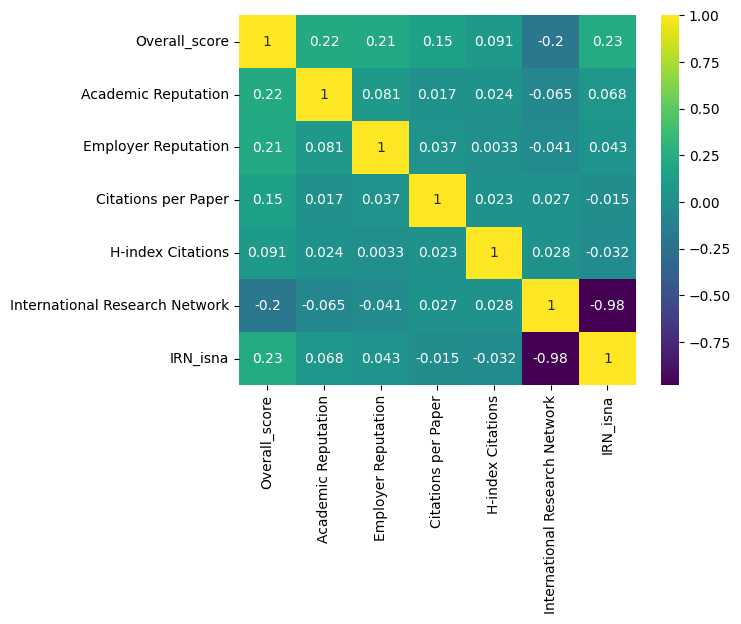

In [ ]:
# Correlaciones

# Obtener la tabla de correlación
corr = df_analisis.corr()

# Graficar la tabla de correlación en un mapa de calor
sns.heatmap(corr, cmap='viridis', annot=True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

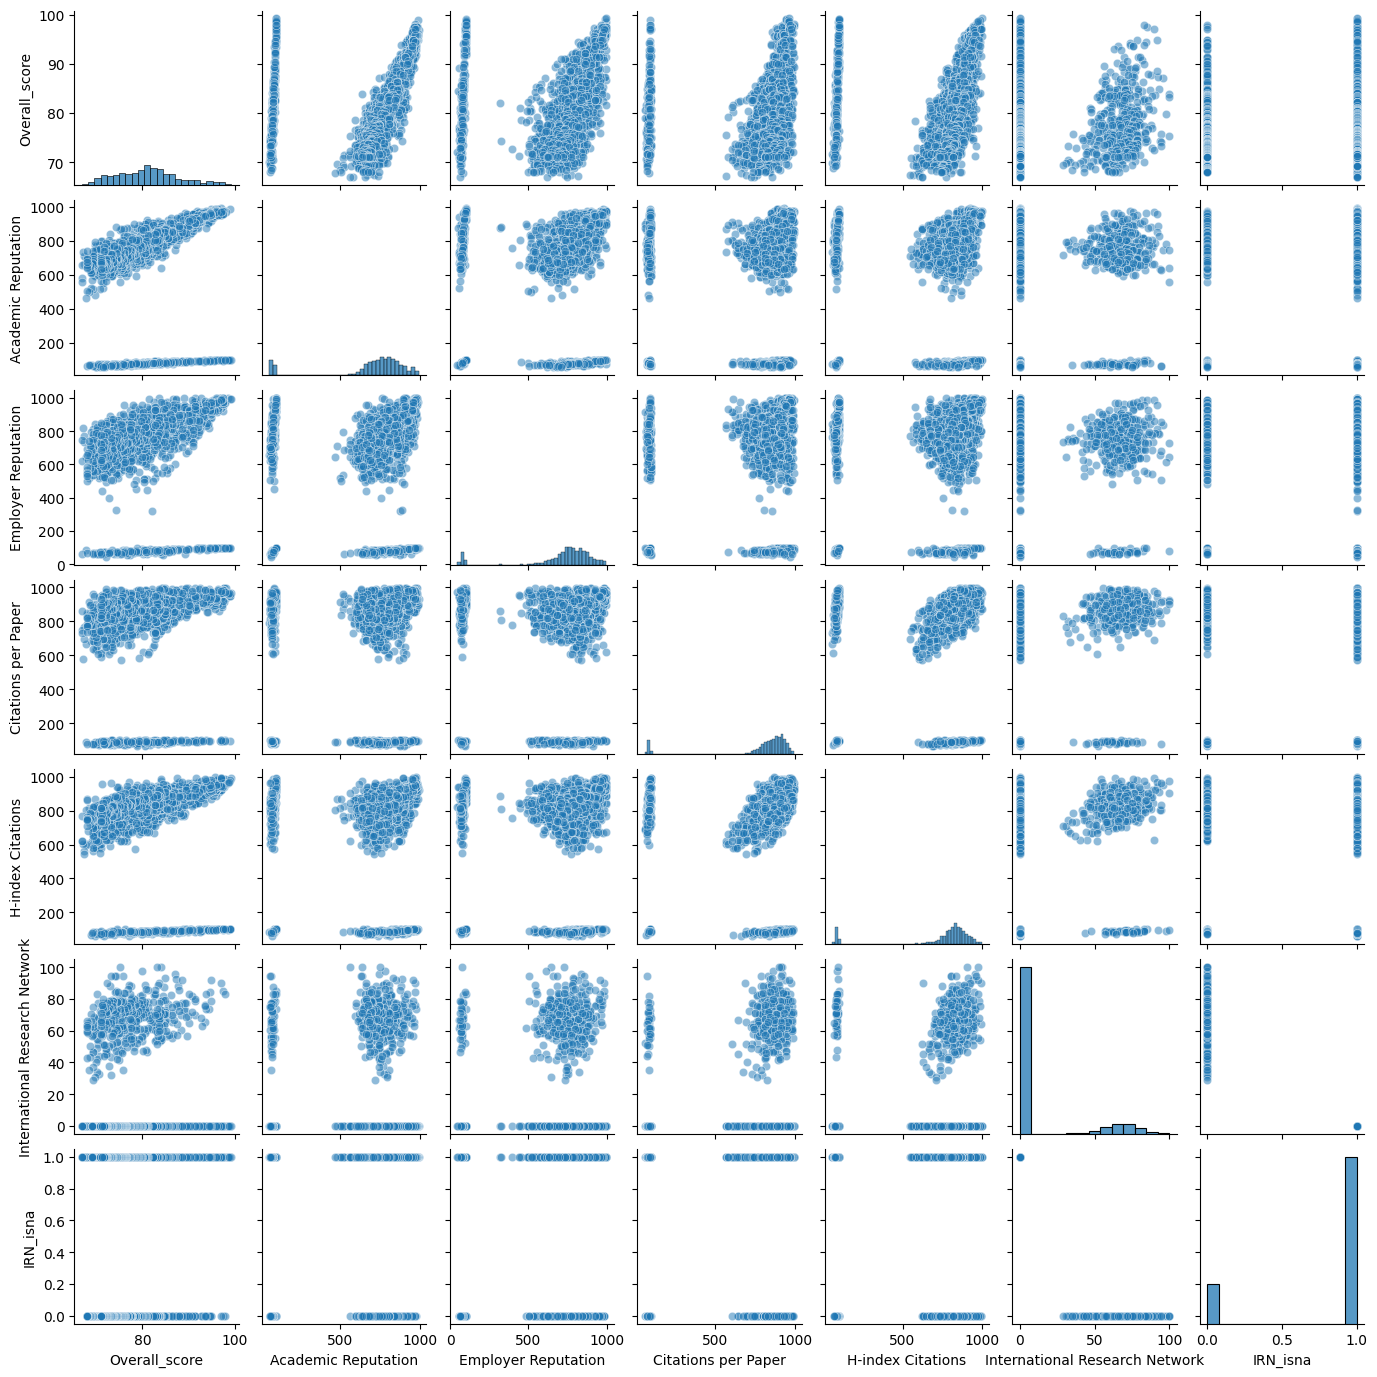

In [ ]:
# prompt: dame un spairplot de df_analisis con un nivel de transparencia de los puntos de 0.5

sns.pairplot(data=df.iloc[:,7:], palette='viridis', diag_kind='hist', height=2, markers='o', plot_kws={'alpha':0.5})
plt.show()


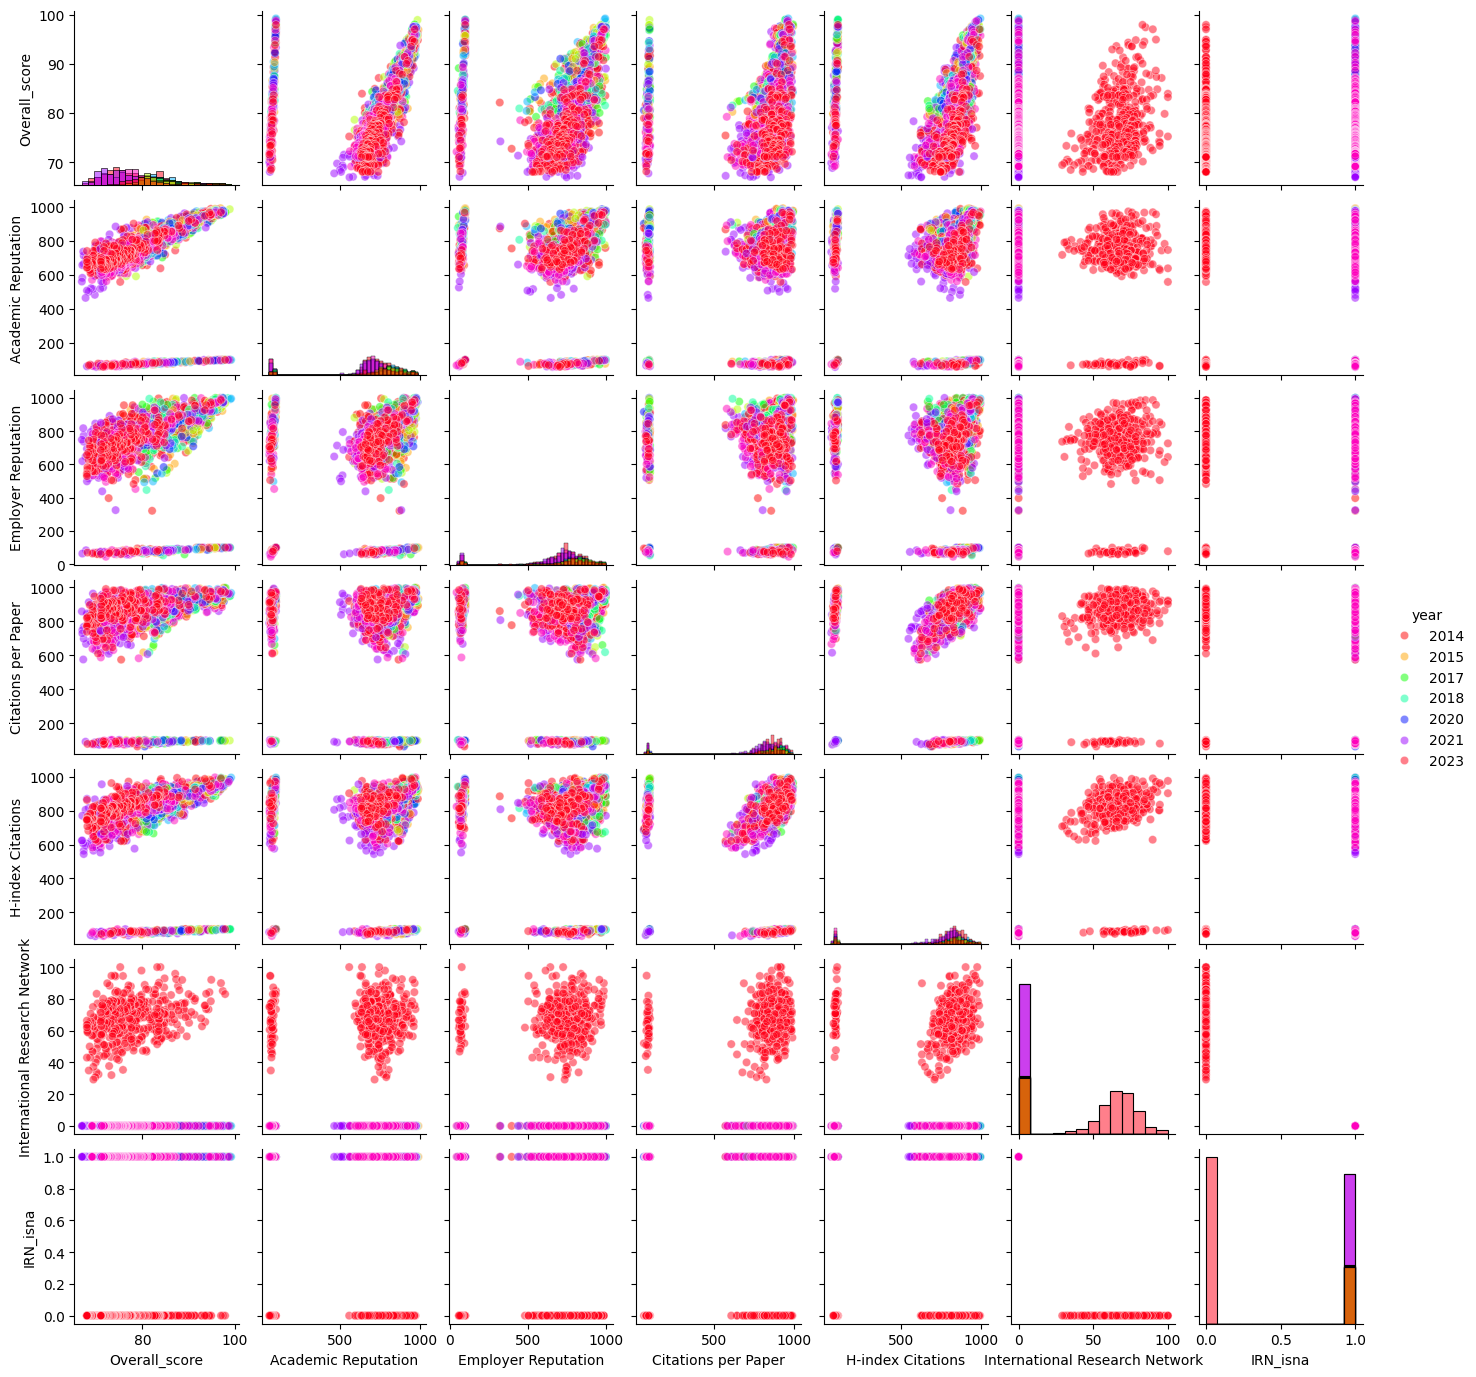

In [ ]:
sns.pairplot(data=df.iloc[:,[0,7,8,9,10,11,12,13]], hue='year', palette='hsv', diag_kind='hist', height=2, markers='o', plot_kws={'alpha':0.5})
plt.show()

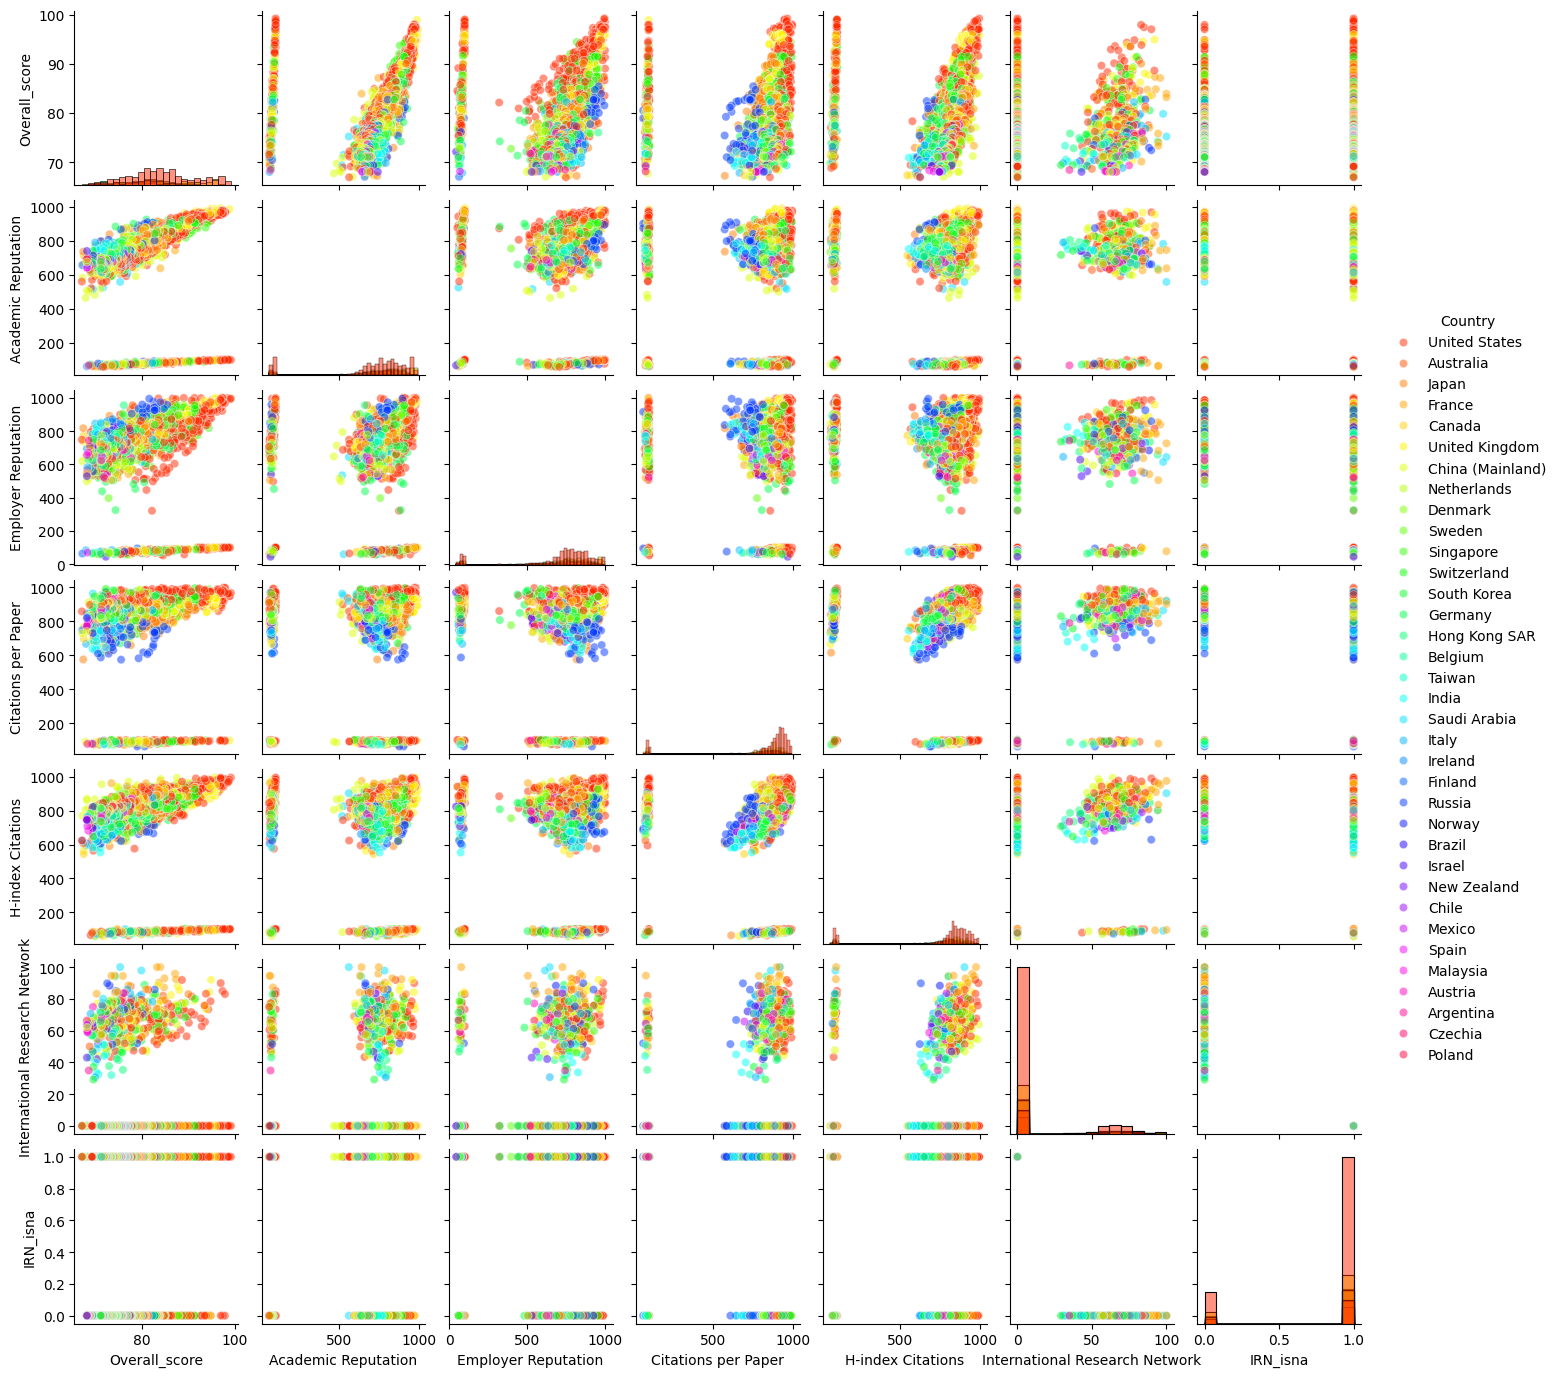

In [ ]:
sns.pairplot(data=df.iloc[:,6:], hue='Country', palette='hsv', diag_kind='hist', height=2, markers='o', plot_kws={'alpha':0.5})
plt.show()

# Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_analisis.iloc[:, 1:]  # características
y = df_analisis.Overall_score                 # target

# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size es la proporción del conjunto de datos a incluir en el conjunto de prueba
# random_state es una semilla para la generación de números aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

Academic Reputation  Employer Reputation  Citations per Paper  \
651              0.114278             0.183332             0.084978   
867              0.409798             0.096350             0.635830   
1178             0.037361            -0.047169            -0.304345   
360              0.826765             0.692173             0.279640   
978              0.150712             0.700871             0.627547   
...                   ...                  ...                  ...   
1638             0.511004             0.305106            -0.093117   
1095             0.470521             0.300756            -0.101400   
1130            -0.205532            -0.125453            -2.859800   
1294            -0.096230            -0.229830             0.416318   
860              0.539341             0.592144             0.561279   

      H-index Citations  International Research Network  IRN_isna  
651            0.068761                        2.348987 -2.046647  
867            0.718215                       -0.478878  0.488604  
1178          -0.138427                       -0.478878  0.488604  
360            0.375559                       -0.478878  0.488604  
978            0.395480                       -0.478878  0.488604  
...                 ...                             ...       ...  
1638           0.395480                       -0.478878  0.488604  
1095           0.220168                       -0.478878  0.488604  
1130           0.068761                       -0.478878  0.488604  
1294           0.001027                       -0.478878  0.488604  
860            0.491106                       -0.478878  0.488604  

[1847 rows x 6 columns]

# Regresión Múltiple

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Crear el modelo de regresión lineal
model_lineal = LinearRegression()

# Entrenar el modelo
model_lineal.fit(X_train, y_train)

LinearRegression()

## Evaluación

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = model_lineal.predict(X_test)

In [ ]:
# Calcular el error absoluto porcentaje medio (MAE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular el coeficiente de determinación (R²)
r_squared = r2_score(y_test, y_pred)

print("Error Absoluto Porcentaje Medio (MAPE):", mape)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r_squared)

Error Absoluto Porcentaje Medio (MAPE): 2.0037696522103765
Raíz del Error Cuadrático Medio (RMSE): 0.9276341058085107
Coeficiente de Determinación (R²): 0.16680106378989457


Métricas para regresiones lineales:
  - https://vitalflux.com/mse-vs-rmse-vs-mae-vs-mape-vs-r-squared-when-to-use/
  - https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/

<br>

Resumen y comparación:

R² (Coeficiente de Determinación):

  - Escala: Varía de 0 a 1.
  - Interpretación:
    - Cerca de 1: Indica que el modelo explica una gran proporción de la varianza en la variable dependiente. Es un indicador de un buen modelo.
    - Cerca de 0: Sugiere que el modelo no explica bien la variabilidad de los datos. Es un indicador de un modelo pobre.
    - Valores intermedios: Indican un ajuste moderado del modelo a los datos.

RMSE (Raíz del Error Cuadrático Medio) y MSE (Error Cuadrático Medio):
  - Escala: Varía de 0 a infinito.
  - Interpretación:
    - Cerca de 0: Indica un buen modelo con pequeños errores en las predicciones.
    - Valores altos: Sugieren un modelo con grandes errores en las predicciones.
    - RMSE es más interpretable ya que está en las mismas unidades que la variable de respuesta.

MAE (Error Absoluto Medio):

  - Escala: Varía de 0 a infinito.
  - Interpretación:
    - Cerca de 0: Indica que las predicciones son muy precisas.
    - Valores altos: Indican imprecisión en las predicciones.
    - MAE es robusto a outliers y proporciona una medida directa del error medio.

MAPE (Error Porcentual Absoluto Medio):
  - Escala: Generalmente expresada en porcentajes, varía de 0% a ∞%.
  - Interpretación:
    - Valor bajo (cercano a 0%): Indica un buen modelo, con errores pequeños en relación al valor real.
    - Valor alto: Indica un mal modelo, con grandes errores porcentuales.


## Pesos

In [ ]:
# Pesos del model_lineal
coeficientes = model_lineal.coef_
bias = model_lineal.intercept_
print(f"""
coeficientes: {list(coeficientes)}
bias:         {bias}
""")



coeficientes: [0.17613445014566, 0.19764226100921767, 0.1284238541720163, 0.0836735306771111, 0.6857933029368173, 0.8755606430017064]
bias:         0.006642523594222621



## Validar modelo matemático

In [ ]:
# Obtener la media de las características
u = scaler.mean_[1:]
u_score = scaler.mean_[0]

# Obtener la desviación estándar de las características
s = scaler.scale_[1:]
s_score = scaler.scale_[0]

# Selección del registro a analizar para la comparación
i=0
index = X_test.iloc[[i],:].index[0]

print(f"Columnas analizadas:             {X_test.columns.to_list()}\n")

# Inputs del modelo
input_scaled = X_test.iloc[[i],:].to_numpy()
input_noscaled = X_test.iloc[[i],:].to_numpy()[0]*s+u
print(f"Valores de entrada NO escalados: {input_noscaled.tolist()}")
print(f"Valores de entrada escalados:    {input_scaled[0].tolist()}")

# Salidas
print("\n\tValores reescalados para ser interpretables...")
salida_true = y_test.iloc[i]
print(f"Valor de Salida (true):                     {salida_true*s_score+u_score}")

salida_pred = model_lineal.predict(input_scaled)[0]
print(f"Valor de Salida (prediction):               {salida_pred*s_score+u_score}")

salida_con_coeficientes = np.array([input_scaled[0,j]*coeficientes[j] for j in range(6)]).sum()+bias
print(f"Valor de Salida (calculada con matemática): {salida_con_coeficientes*s_score+u_score}")

Columnas analizadas:             ['Academic Reputation', 'Employer Reputation', 'Citations per Paper', 'H-index Citations', 'International Research Network', 'IRN_isna']

Valores de entrada NO escalados: [633.0, 73.0, 942.0, 825.0, 0.0, 1.0]
Valores de entrada escalados:    [-0.2703034487296079, -2.7914333280624715, 0.6275465667777489, 0.3317303341474383, -0.4788776605277111, 0.4886040376208522]

	Valores reescalados para ser interpretables...
Valor de Salida (true):                     75.3
Valor de Salida (prediction):               78.50892087334611
Valor de Salida (calculada con matemática): 78.50892087334611


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df.iloc[[index],7:]

Overall_score  Academic Reputation  Employer Reputation  \
4574           75.3                633.0                 73.0   

      Citations per Paper  H-index Citations  International Research Network  \
4574                942.0              825.0                             0.0   

      IRN_isna  
4574         1

# Red Neuronal - MLP

In [ ]:
!pip install keras-tuner # Librería para el Hyperparameter tunning87

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras
from keras import layers, models, callbacks
from keras.layers import Layer
from tensorflow.keras import optimizers, losses, backend as K

from keras_tuner import HyperModel
from keras_tuner.tuners import Hyperband

In [ ]:
# Configuration to active custom loss function
# https://stackoverflow.com/questions/66287143/keras-loss-functionfrom-keras-input
'''
En el tf 2.0, el `eager mode` está activado de forma predeterminada.
No es posible obtener esta funcionalidad en modo entusiasta ya que el ejemplo anterior está escrito actualmente.
Creo que hay formas de hacerlo en modo ansioso con una programación más avanzada.
Pero de lo contrario, es una cuestión simple de desactivar el `eager mode` y ejecutarlo en `graph mode` con:
'''
# [eager execution vs graph](https://jonathan-hui.medium.com/tensorflow-eager-execution-v-s-graph-tf-function-6edaa870b1f1)

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
# Al hacer esto no podremos guardar los modelos como .keras, quedándonos
# solo la opción de guardarlos como .h5

In [ ]:
#@title Inicialización de directorios para este proyecto
import os

directory = project_path+'QS'
folder_history = directory+'/historicos_MLP'
folder_models = directory+'/modelos_MLP'

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

## Crear modelos

In [ ]:
# ---------------- Custom Loss Function ----------------
class RMSELoss(losses.Loss):
    # Cuando guardemos y luego carguemos un modelo usando el scope
    # va a solicitar que el constructor haga uso de 'reduction' y 'name'
    # Integrarlas permite que tu función de pérdida personalizada se comporte
    # de manera similar a las funciones de pérdida integradas en Keras
    def __init__(self, reduction=losses.Reduction.AUTO, name='RMSELoss'):
        '''
         Cuando entrenas un modelo con lotes de datos, cada ejemplo en el lote
         tiene su propia pérdida. El parámetro reduction define cómo estas
         pérdidas individuales deben combinarse (reducirse) para formar
         una única pérdida que el algoritmo de optimización puede utilizar
         para actualizar los pesos del modelo.
         En este caso AUTO da la orden de calcular el promedio del loss por lote.
        '''
        super(RMSELoss, self).__init__(reduction=reduction)

    # adds the custom loss to the class
    def call(self, y_true, y_pred):
        loss = K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
        #tf.print("este es el loss:", loss)
        #tf.print(type(loss))
        return loss

# ---------------------- Métricas ----------------------
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))


tf.keras.utils.get_custom_objects().update({'RMSELoss': RMSELoss})
tf.keras.utils.get_custom_objects().update({'rmse': rmse})
tf.keras.utils.get_custom_objects().update({'r_squared': r_squared})


In [ ]:
# Configuración de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1],
    'optimizer': [optimizers.legacy.SGD, optimizers.legacy.Adam, optimizers.legacy.RMSprop, optimizers.legacy.Nadam], # , 'adadelta', 'adagrad', 'adamax'
    'batch_size': [8, 10, 12, 15, 18, 20],
    'num_layers': [1, 4],         # Debe generar todas las combinaciones posibles aquí
    'neurons_per_layer': [3, 14]  # Debe generar todas las combinaciones posibles aquí
}

param_grid['optimizer_name'] = [optimizer.__name__ for optimizer in param_grid['optimizer']]


In [ ]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Primera capa oculta
        model.add(layers.Dense(units=hp.Int('units_input',
                                            min_value=param_grid['neurons_per_layer'][0],
                                            max_value=param_grid['neurons_per_layer'][1],
                                            step=1
                                            ), activation='linear', input_dim=6))
        # Se agregan más capas ocultas acorde se vaya iterando
        for i in range(hp.Int('num_layers', param_grid['num_layers'][0], param_grid['num_layers'][1])):
            model.add(layers.Dense(units=hp.Int(f'units_{i}',
                                                min_value=param_grid['neurons_per_layer'][0],
                                                max_value=param_grid['neurons_per_layer'][1],
                                                step=1
                                                ), activation='linear'))

        model.add(layers.Dense(1, activation='linear')) # Capa de salida

        # Elige el optimizador
        index_optimizer = values=param_grid['optimizer_name'].index(hp.Choice('optimizer', values=param_grid['optimizer_name'])) # Obtiene el íntice del obtimizador
        optimizer = values=param_grid['optimizer'][index_optimizer]
        model.compile(
            optimizer=optimizer(learning_rate=hp.Choice('learning_rate', values=param_grid['learning_rate'])), # Le asigna un learning_rate al optimizador
            loss=RMSELoss(), # Nuestra Custom Loss Function
            metrics=['mape', rmse, r_squared]
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

        # Agrega a los argumentos kwargs el callback de early stopping
        # Es necesario este bloque porque sino salta el error:
        '''
        TypeError: keras.src.engine.training_v1.Model.fit() got multiple values for keyword argument 'callbacks'
        '''
        # Este error salta al momento del entrenamiento
        if 'callbacks' in kwargs:
            kwargs['callbacks'].append(early_stopping)
        else:
            kwargs['callbacks'] = [early_stopping]

        return model.fit(*args, **kwargs) # Entrenamiento

# Inicializando el Tunner
hypermodel = None
hypermodel = MyHyperModel()

tuner= None
tuner = Hyperband(
    hypermodel,
    objective='val_loss',
    max_epochs=100,  # max_epochs igualado a 100
    factor=9, # Profundidad de búsqueda
    directory=directory,
    project_name='MLP_keras_hyperband',
    seed=42
)


In [ ]:
# Entrenamiento
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test)
             )

Trial 146 Complete [00h 00m 03s]
val_loss: 0.71040240639732

Best val_loss So Far: 0.7057275609536604
Total elapsed time: 00h 05m 46s


  1. Un csv que guarde el nombre del archivo del siguiente doc explicado y los valores de las métricas seleccionadas (asuma que fueron: ['mape', rmes, r_squared]). Adicional agrega las configuraciones seleccionadas para la creación de este modelo.
  2. Guarda de cada modelo, un histórico de los valores de sus métricas en csv, el nombre de estos archivos está en el csv del item 1. Estos archivos guárdalos en la carpeta "historicos".
  3. Guarda por cada modelo, su archivo h5 correspondiente en la carpeta "modelos".
Adicional, en la misma carpeta donde se encuentra nuestro archivo python, guarda también el modelo h5 categorizado como el mejor de todos.

In [ ]:
from tqdm.auto import tqdm
import warnings
import time


# Suprimir la advertencia que sale por usar formato .h5 y no .keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')
# Suprimir la advertencia por load_model
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.iter
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

# DataFrame para guardar los resultados
results_df = pd.DataFrame()

# Barra de progreso para el proceso de recuperación
num_trials = 50
progress_bar = tqdm(total=num_trials, desc='Processing Trials')

#try:
for trial in tuner.oracle.get_best_trials(num_trials=num_trials):
    trial_id = trial.trial_id

    # El modelo ya está cargado con los parámetros y pesos óptimos (según la conf de esta iteración)
    model = tuner.hypermodel.build(trial.hyperparameters)  # con tuner.load model habían características que no cargaban correctamente
    model_name = f'modelo_{trial_id}'
    model_filename = f'{folder_models}/{model_name}.h5'
    model.save(model_filename) # GUARDAR modelo

    hist_df = pd.DataFrame()
    # Obtener el histórico para cada métrica y añadirlo al DataFrame
    for metric in ['mape', 'rmse', 'r_squared']:
        metric_history_val = trial.metrics.get_history('val_' + metric)
        metric_history_train = trial.metrics.get_history(metric)

        for i, (m_train, m_val) in enumerate(zip(metric_history_train, metric_history_val)):
            hist_df.at[i, 'epoch'] = m_train.step
            hist_df.at[i, f'train_{metric}'] = m_train.value
            hist_df.at[i, f'val_{metric}'] = m_val.value

    hist_filename = f'{folder_history}/{model_name}.csv'
    hist_df.to_csv(hist_filename) # GUARDAR history del modelo

    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            'trial_id': trial_id,
            'model_name': model_name,
            'mape': trial.metrics.get_best_value('mape'),
            'rmse': trial.metrics.get_best_value('rmse'),
            'r_squared': trial.metrics.get_best_value('r_squared'),
            **trial.hyperparameters.values
            }])
        ], ignore_index=True)

    progress_bar.update(1)

progress_bar.close()
#except Exception as e:
#    print(f'\n\nError occurred on line {e.__traceback__.tb_lineno}: {e}')


progress_bar.close()
# GUARDAR resumen de métricas de los diferentes modelos probados
results_df.to_csv(directory+'/resultadosMLP_modelos_QS.csv', index=False)
print(results_df.shape)

Processing Trials: 100%|██████████| 50/50 [00:40<00:00,  1.23it/s]

(50, 18)


In [ ]:
#@title Save BEST model
best_trial = None
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
#best_model = tuner.load_model(best_trial)
best_model_name = f'MLPmejor_modelo_{best_trial.trial_id}'

best_model = tuner.hypermodel.build(best_trial.hyperparameters)  # con tuner.load_model habían características que no cargaban correctamente
best_model.save(f'{directory}/{best_model_name}.h5') # GUARDAR modelo
# Lo mejor sería guardarlo en formato .keras
# pero como no se tiene el "eager execution" habilitado, no podemos utilizar ese formato

print(f"Trial del mejor modelo: {best_trial}")
print(f'\nCompile config:\n{best_model.get_config()}\n')
best_model.summary()

Trial del mejor modelo: <keras_tuner.src.engine.trial.Trial object at 0x7db49a26a050>

Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_204_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_204', 'trainable': True, 'batch_input_shape': (None, 6), 'dtype': 'float32', 'units': 6, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape':

In [ ]:
#@title Load BEST model
from tensorflow.keras.utils import custom_object_scope

# Como nuestros modelos usan funciones personalizadas, necesitamos añadir al scope
# dichas funciones y objetos, de lo contrario no podremos cargar ningún modelo
''' Con esto evitamos el siguiente error:
ValueError: Unknown loss function: 'RMSELoss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
'''
with custom_object_scope({'RMSELoss': RMSELoss,
                          'rmse':rmse,
                          'r_squared':r_squared
                          }):
    loaded_modelMLP = models.load_model(f'{directory}/MLPmejor_modelo_{best_trial.trial_id}.h5')
    #loaded_modelMLP = models.load_model(f'{directory}/MLPmejor_modelo_0110.h5') # Ingreso manual del nombre del modelo

print(f'\nCompile config:\n{loaded_modelMLP.get_config()}\n')
loaded_modelMLP.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_204_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_204', 'trainable': True, 'batch_input_shape': (None, 6), 'dtype': 'float32', 'units': 6, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 6)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'de

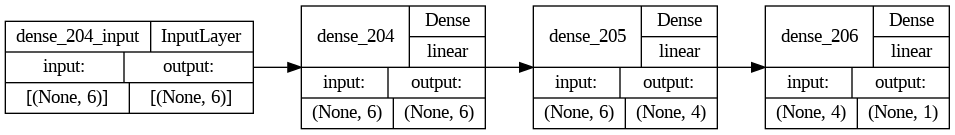

In [ ]:
#@title Imagen de la red del modelo
path_img_file = directory+"/image_redMLP.jpg"
tf.keras.utils.plot_model(loaded_modelMLP,
                          #to_file=path_img_file,
                          #dpi=96, # Determina el tamaño de la imagen y por ende, su calidad, por defecto en 96
                          rankdir='LR', # LR para horizontal. TR para vertical
                          #expand_nested=False,
                          #show_trainable=True,
                          show_shapes=True,
                          show_layer_names=True,
                          show_layer_activations=True
                          )

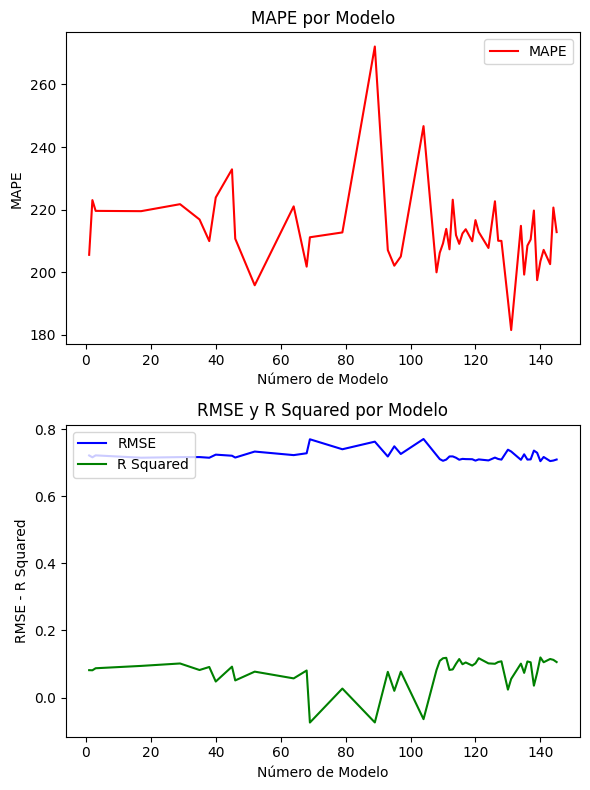

Modelo con el MAPE más bajo ->             value: 181.5178680419922 ;    model: modelo_0131
Modelo con el RMSE más bajo ->             value: 0.7051807641983032 ;    model: modelo_0140
Modelo con el R Squared más cercano a 1 -> value: 0.1195832267403602 ;    model: modelo_0140


In [ ]:
#@title Comparativa de métricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos
df = pd.read_csv(directory+'/resultadosMLP_modelos_QS.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Primer gráfico para 'mape'
sns.lineplot(data=df, x='trial_id', y='mape', color='red', label='MAPE', ax=ax1)
ax1.set_title('MAPE por Modelo')
ax1.set_xlabel('Número de Modelo')
ax1.set_ylabel('MAPE')

# Segundo gráfico para 'rmse' y 'r_squared'
sns.lineplot(data=df, x='trial_id', y='rmse', color='blue', label='RMSE', ax=ax2)
sns.lineplot(data=df, x='trial_id', y='r_squared', color='green', label='R Squared', ax=ax2)
ax2.set_title('RMSE y R Squared por Modelo')
ax2.set_xlabel('Número de Modelo')
ax2.set_ylabel('RMSE - R Squared')
ax2.legend(loc='upper left')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Encontrar los modelos con los mejores valores
best_mape_model, mape_bestvalue = df.iloc[df['mape'].idxmin()]['model_name'], df.iloc[df['mape'].idxmin()]['mape']
best_rmse_model, rmse_bestvalue = df.iloc[df['rmse'].idxmin()]['model_name'], df.iloc[df['rmse'].idxmin()]['rmse']
best_rsquared_model, rsquared_bestvalue = df.iloc[(df['r_squared']-1).abs().idxmin()]['model_name'], df.iloc[(df['r_squared']-1).abs().idxmin()]['r_squared']

print(f"Modelo con el MAPE más bajo ->             value: {mape_bestvalue} ;    model: {best_mape_model}")
print(f"Modelo con el RMSE más bajo ->             value: {rmse_bestvalue} ;    model: {best_rmse_model}")
print(f"Modelo con el R Squared más cercano a 1 -> value: {rsquared_bestvalue} ;    model: {best_rsquared_model}")


In [ ]:
loss, mape, rmse_value, r_squared_value = loaded_modelMLP.evaluate(X_test, y_test)
print(f"""Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

Loss
RMSE Loss: 1.368515836212026

Métricas del modelo
MAPE: 388.7505798339844
RMSE: 1.3685157299041748
R2:   -2.069155216217041



## Pesos

In [ ]:
loaded_modelMLP.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 6)                 42        
                                                                 
 dense_205 (Dense)           (None, 4)                 28        
                                                                 
 dense_206 (Dense)           (None, 1)                 5         
                                                                 
Total params: 75 (300.00 Byte)
Trainable params: 75 (300.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weights_MLPmodel = loaded_modelMLP.get_weights()
weights_MLPmodel

[array([[-0.6202519 , -0.3471216 , -0.63517493, -0.41442153,  0.24415886,
         -0.5556042 ],
        [-0.0407688 , -0.14454192,  0.37480968,  0.23845422, -0.05748355,
         -0.2860677 ],
        [-0.21435988, -0.41156295, -0.41363725,  0.4816007 , -0.21695578,
          0.11702377],
        [ 0.5057197 , -0.3510288 , -0.19998425,  0.01961023,  0.4977011 ,
         -0.05385506],
        [ 0.03550905, -0.14867622, -0.48985577, -0.70256585,  0.37233824,
          0.6147774 ],
        [-0.08732271, -0.5711835 , -0.2505261 , -0.62831324, -0.3894266 ,
         -0.0854128 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.3618635 ,  0.56729853,  0.05884886,  0.3132391 ],
        [-0.31282094,  0.48429537, -0.31603637, -0.34755355],
        [ 0.53187966, -0.42117867,  0.0877986 , -0.5759793 ],
        [ 0.18989354, -0.49388522, -0.71057504,  0.01614493],
        [-0.4679961 ,  0.43420935, -0.66229683, -0.37042668],
        [ 0.14896667,  0.6040678 , -0.1400

In [ ]:
weights_capa1_MLP = weights_MLPmodel[0] # Cada fila son los pesos de una neurona diferente
bias_capa1_MLP = weights_MLPmodel[1]
weights_capa2_MLP = weights_MLPmodel[2]
bias_capa2_MLP = weights_MLPmodel[3]
weights_capaSalida_MLP = weights_MLPmodel[4]
bias_capaSalida_MLP = weights_MLPmodel[5]

print(f"Pesos CAPA1:\n{weights_capa1_MLP}")
print(f"\nBias  CAPA1:\n{bias_capa1_MLP}")
print(f"\n\nPesos CAPA2:\n{weights_capa2_MLP}")
print(f"\nBias  CAPA2:\n{bias_capa2_MLP}")
print(f"\n\nPesos CAPA3:\n{weights_capa3_MLP}")
print(f"\nBias  CAPA3:\n{bias_capa3_MLP}")
print(f"\n\nPesos capa de salida:\n{weights_capaSalida_MLP}")
print(f"\nBias capa de salida:\n{bias_capaSalida_MLP}")

Pesos CAPA1:
[[-0.6202519  -0.3471216  -0.63517493 -0.41442153  0.24415886 -0.5556042 ]
 [-0.0407688  -0.14454192  0.37480968  0.23845422 -0.05748355 -0.2860677 ]
 [-0.21435988 -0.41156295 -0.41363725  0.4816007  -0.21695578  0.11702377]
 [ 0.5057197  -0.3510288  -0.19998425  0.01961023  0.4977011  -0.05385506]
 [ 0.03550905 -0.14867622 -0.48985577 -0.70256585  0.37233824  0.6147774 ]
 [-0.08732271 -0.5711835  -0.2505261  -0.62831324 -0.3894266  -0.0854128 ]]

Bias  CAPA1:
[0. 0. 0. 0. 0. 0.]


Pesos CAPA2:
[[ 0.3618635   0.56729853  0.05884886  0.3132391 ]
 [-0.31282094  0.48429537 -0.31603637 -0.34755355]
 [ 0.53187966 -0.42117867  0.0877986  -0.5759793 ]
 [ 0.18989354 -0.49388522 -0.71057504  0.01614493]
 [-0.4679961   0.43420935 -0.66229683 -0.37042668]
 [ 0.14896667  0.6040678  -0.1400764   0.29204726]]

Bias  CAPA2:
[0. 0. 0. 0.]


Pesos CAPA3:
[[ 0.892545  ]
 [ 0.12710786]
 [-1.0230155 ]
 [-0.51252407]]

Bias  CAPA3:
[0.]


Pesos capa de salida:
[[ 0.892545  ]
 [ 0.12710786]
 [-

## Validación

In [ ]:
early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

historial_MLP = loaded_modelMLP.fit(X_train,
                                    y_train,
                                    validation_data=(X_train,y_train),
                                    epochs=100,
                                    callbacks = [early_stopping]
                                    )

Train on 1847 samples, validate on 1847 samples
Epoch 1/100
1847/1847 [==============================] - 0s 184us/sample - loss: 0.8058 - mean_absolute_percentage_error: 230.8432 - rmse: 0.8058 - r_squared: -0.1686 - val_loss: 0.7263 - val_mean_absolute_percentage_error: 234.7315 - val_rmse: 0.7263 - val_r_squared: 0.0544
Epoch 2/100
1847/1847 [==============================] - 0s 96us/sample - loss: 0.7268 - mean_absolute_percentage_error: 221.4106 - rmse: 0.7268 - r_squared: 0.0701 - val_loss: 0.7246 - val_mean_absolute_percentage_error: 210.4644 - val_rmse: 0.7246 - val_r_squared: 0.0806
Epoch 3/100
1847/1847 [==============================] - 0s 94us/sample - loss: 0.7223 - mean_absolute_percentage_error: 207.1385 - rmse: 0.7223 - r_squared: 0.0870 - val_loss: 0.7222 - val_mean_absolute_percentage_error: 244.8842 - val_rmse: 0.7222 - val_r_squared: 0.0468
Epoch 4/100
1847/1847 [==============================] - 0s 100us/sample - loss: 0.7212 - mean_absolute_percentage_error: 216.64

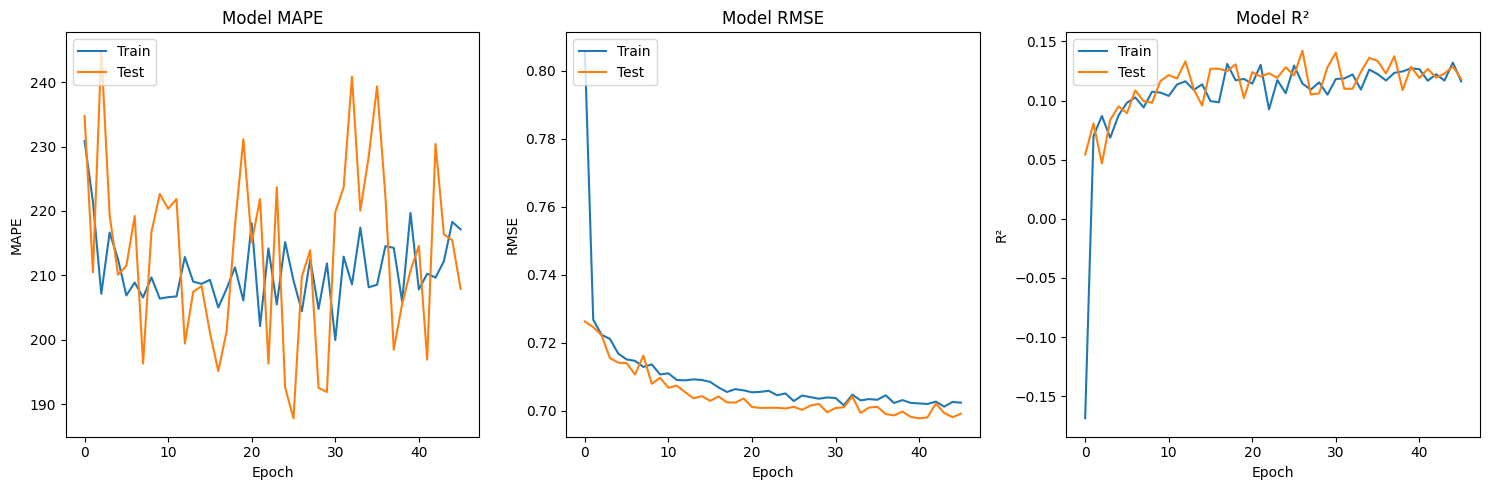

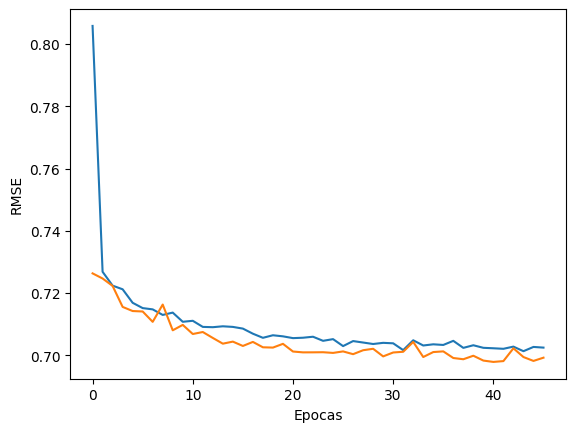

In [ ]:
#Evaluacion del modelo 1
loss, mape, rmse_value, r_squared_value = loaded_modelMLP.evaluate(X_test, y_test)

# Configurar el layout del subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas, tamaño total del plot

# Graficar MAPE
axs[0].plot(historial_MLP.history['mean_absolute_percentage_error'])
axs[0].plot(historial_MLP.history['val_mean_absolute_percentage_error'])
axs[0].set_title('Model MAPE')
axs[0].set_ylabel('MAPE')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Graficar RMSE
axs[1].plot(historial_MLP.history['rmse'])
axs[1].plot(historial_MLP.history['val_rmse'])
axs[1].set_title('Model RMSE')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Graficar R²
axs[2].plot(historial_MLP.history['r_squared'])
axs[2].plot(historial_MLP.history['val_r_squared'])
axs[2].set_title('Model R²')
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Epoch')
axs[2].legend(['Train', 'Test'], loc='upper left')

# Mostrar el plot
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
plt.xlabel("Epocas")
plt.ylabel("RMSE")
plt.plot(historial_MLP.history['loss'], label="loss")
plt.plot(historial_MLP.history['val_loss'], label="val_loss")
plt.show()

Antes del Re-entrenamiento

Loss

RMSE Loss: 1.368515836212026

<br>

Métricas del modelo
- MAPE: 388.7505798339844
- RMSE: 1.3685157299041748
- R2:   -2.069155216217041


In [ ]:
print(f"""\tDespués del Re-entrenamiento
Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

	Después del Re-entrenamiento
Loss
RMSE Loss: 0.7171417492808718

Métricas del modelo
MAPE: 209.3390655517578
RMSE: 0.7171418070793152
R2:   0.09450381249189377



### Pesos luego del re-entrenamiento

In [ ]:
loaded_modelMLP.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 6)                 42        
                                                                 
 dense_205 (Dense)           (None, 4)                 28        
                                                                 
 dense_206 (Dense)           (None, 1)                 5         
                                                                 
Total params: 75 (300.00 Byte)
Trainable params: 75 (300.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weights_MLPmodel_retrained = loaded_modelMLP.get_weights()
weights_MLPmodel_retrained

[array([[-0.55662227, -0.24291584, -0.51966304, -0.20841108,  0.32377243,
         -0.51368475],
        [-0.1088604 , -0.3216667 ,  0.42612702,  0.2115228 ,  0.0137043 ,
         -0.25799966],
        [-0.17538321, -0.35927242, -0.37599507,  0.46536517, -0.18964583,
          0.12763605],
        [ 0.49652553, -0.28241333, -0.19478783,  0.00789586,  0.43190372,
         -0.0612581 ],
        [-0.09889119, -0.4275385 , -0.363329  , -0.68257564,  0.3722205 ,
          0.5234968 ],
        [-0.21392688, -0.7937611 , -0.09490424, -0.50838536, -0.13756275,
         -0.0543686 ]], dtype=float32),
 array([ 0.00647615,  0.00688683, -0.01437137, -0.018065  , -0.011828  ,
         0.00759299], dtype=float32),
 array([[ 0.13392574,  0.5268188 ,  0.30449295,  0.42892012],
        [-0.7781087 ,  0.43644783,  0.14212255, -0.10289598],
        [ 0.30068284, -0.41829112,  0.31651348, -0.44602284],
        [-0.32858407, -0.48869792, -0.21467772,  0.27419284],
        [-0.52885973,  0.40025237, -0.5751

In [ ]:
weights_capa1_MLP_retrained = weights_MLPmodel_retrained[0] # Cada fila son los pesos de una neurona diferente
bias_capa1_MLP_retrained = weights_MLPmodel_retrained[1]
weights_capa2_MLP_retrained = weights_MLPmodel_retrained[2]
bias_capa2_MLP_retrained = weights_MLPmodel_retrained[3]
weights_capaSalida_MLP_retrained = weights_MLPmodel_retrained[4]
bias_capaSalida_MLP_retrained = weights_MLPmodel_retrained[5]

print(f"Pesos CAPA1:\n{weights_capa1_MLP_retrained}")
print(f"\nBias  CAPA1:\n{bias_capa1_MLP_retrained}")
print(f"\n\nPesos CAPA2:\n{weights_capa2_MLP_retrained}")
print(f"\nBias  CAPA2:\n{bias_capa2_MLP_retrained}")
print(f"\n\nPesos capa de salida:\n{weights_capaSalida_MLP_retrained}")
print(f"\nBias capa de salida:\n{bias_capaSalida_MLP_retrained}")

Pesos CAPA1:
[[-0.55662227 -0.24291584 -0.51966304 -0.20841108  0.32377243 -0.51368475]
 [-0.1088604  -0.3216667   0.42612702  0.2115228   0.0137043  -0.25799966]
 [-0.17538321 -0.35927242 -0.37599507  0.46536517 -0.18964583  0.12763605]
 [ 0.49652553 -0.28241333 -0.19478783  0.00789586  0.43190372 -0.0612581 ]
 [-0.09889119 -0.4275385  -0.363329   -0.68257564  0.3722205   0.5234968 ]
 [-0.21392688 -0.7937611  -0.09490424 -0.50838536 -0.13756275 -0.0543686 ]]

Bias  CAPA1:
[ 0.00647615  0.00688683 -0.01437137 -0.018065   -0.011828    0.00759299]


Pesos CAPA2:
[[ 0.13392574  0.5268188   0.30449295  0.42892012]
 [-0.7781087   0.43644783  0.14212255 -0.10289598]
 [ 0.30068284 -0.41829112  0.31651348 -0.44602284]
 [-0.32858407 -0.48869792 -0.21467772  0.27419284]
 [-0.52885973  0.40025237 -0.57516956 -0.33211458]
 [ 0.12980683  0.55845845 -0.07247878  0.3084925 ]]

Bias  CAPA2:
[-0.03068102  0.00055648  0.03188473  0.01739274]


Pesos capa de salida:
[[ 0.9220783 ]
 [ 0.05261364]
 [-0.624

In [ ]:
#@title Guardado de modelo Re-entrenado
loaded_modelMLP.save(f'{directory}/{best_model_name}-retrained.h5') # GUARDAR modelo
#loaded_modelMLP.save(f'{directory}/MLPmejor_modelo_0110-retrained.h5') # GUARDAR modelo

print(f'\nCompile config:\n{loaded_modelMLP.get_config()}\n')
loaded_modelMLP.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_204_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_204', 'trainable': True, 'batch_input_shape': (None, 6), 'dtype': 'float32', 'units': 6, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 6)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'de

In [ ]:
#@title Guardar pesos y bias como csv
import numpy as np
import pandas as pd

def numpy_array_to_csv(array, file_name):
    # Convertir el arreglo de NumPy en un DataFrame de Pandas
    df = pd.DataFrame(array)

    # Guardar el DataFrame como un archivo CSV
    df.to_csv(file_name, index=False)

numpy_array_to_csv(bias_capa2_MLP_retrained, "bias2MLP.csv")

## Comprimir pesos a función lineal


In [ ]:
from tensorflow.keras.utils import custom_object_scope

with custom_object_scope({'RMSELoss': RMSELoss,
                          'rmse':rmse,
                          'r_squared':r_squared
                          }):
    loaded_model_retrainedMLP = models.load_model(f'{directory}/MLPmejor_modelo_0110-retrained.h5') # Ingreso manual del nombre del modelo
    print(f'\nCompile config:\n{loaded_model_retrainedMLP.get_config()}\n')
loaded_model_retrainedMLP.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_204_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_204', 'trainable': True, 'batch_input_shape': (None, 6), 'dtype': 'float32', 'units': 6, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 6)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'de

In [ ]:
weights_MLPmodel_retrained = loaded_model_retrainedMLP.get_weights()

weights_capa1_MLP_retrained = weights_MLPmodel_retrained[0] # Cada fila son los pesos de una neurona diferente
bias_capa1_MLP_retrained = weights_MLPmodel_retrained[1]
weights_capa2_MLP_retrained = weights_MLPmodel_retrained[2]
bias_capa2_MLP_retrained = weights_MLPmodel_retrained[3]
weights_capaSalida_MLP_retrained = weights_MLPmodel_retrained[4]
bias_capaSalida_MLP_retrained = weights_MLPmodel_retrained[5]

print(f"Pesos CAPA1:\n{weights_capa1_MLP_retrained}")
print(f"\nBias  CAPA1:\n{bias_capa1_MLP_retrained}")
print(f"\n\nPesos CAPA2:\n{weights_capa2_MLP_retrained}")
print(f"\nBias  CAPA2:\n{bias_capa2_MLP_retrained}")
print(f"\n\nPesos capa de salida:\n{weights_capaSalida_MLP_retrained}")
print(f"\nBias capa de salida:\n{bias_capaSalida_MLP_retrained}")

Pesos CAPA1:
[[-0.55662227 -0.24291584 -0.51966304 -0.20841108  0.32377243 -0.51368475]
 [-0.1088604  -0.3216667   0.42612702  0.2115228   0.0137043  -0.25799966]
 [-0.17538321 -0.35927242 -0.37599507  0.46536517 -0.18964583  0.12763605]
 [ 0.49652553 -0.28241333 -0.19478783  0.00789586  0.43190372 -0.0612581 ]
 [-0.09889119 -0.4275385  -0.363329   -0.68257564  0.3722205   0.5234968 ]
 [-0.21392688 -0.7937611  -0.09490424 -0.50838536 -0.13756275 -0.0543686 ]]

Bias  CAPA1:
[ 0.00647615  0.00688683 -0.01437137 -0.018065   -0.011828    0.00759299]


Pesos CAPA2:
[[ 0.13392574  0.5268188   0.30449295  0.42892012]
 [-0.7781087   0.43644783  0.14212255 -0.10289598]
 [ 0.30068284 -0.41829112  0.31651348 -0.44602284]
 [-0.32858407 -0.48869792 -0.21467772  0.27419284]
 [-0.52885973  0.40025237 -0.57516956 -0.33211458]
 [ 0.12980683  0.55845845 -0.07247878  0.3084925 ]]

Bias  CAPA2:
[-0.03068102  0.00055648  0.03188473  0.01739274]


Pesos capa de salida:
[[ 0.9220783 ]
 [ 0.05261364]
 [-0.624

In [ ]:
#@title Funciones de compresión de pesos y bias
import numpy as np

# Weights
wA, wB, wD = weights_capa1_MLP_retrained, weights_capa2_MLP_retrained, weights_capaSalida_MLP_retrained
# Bias
bA, bB, bD = bias_capa1_MLP_retrained, bias_capa2_MLP_retrained, bias_capaSalida_MLP_retrained

def calculate_m(k, wA, wB, wD, bA):
    """
    Conociendo la expresión final deseada de... y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + m6*x6 + m7*x7 + bias
    Calcula el valor de 'm' para un valor de L dado y las matrices w y el vector bA proporcionados.
    """
    if k < 1: raise Exception('Error: parámetro k debe de ser mayor o igual a 1')
    if k%1 != 0: raise Exception('Error: parámetro k debe de ser un número entero')
    else: k = int(k)

    sum_m = 0
    # Asumiendo que L es un índice basado en 1, convertimos a índice basado en 0 para Python.
    k_index = k - 1
    for j in range(wB.shape[0]):
        inner_sum = 0
        for i in range(wD.shape[0]):
            inner_sum += (wD[i, 0] * wB[j, i])
        sum_m += wA[k_index, j] * inner_sum
    return sum_m

def calculate_bias(wB, wD, bA, bB, bD):
    """
    Conociendo la expresión final deseada de... y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + m6*x6 + m7*x7 + bias
    Calcula el valor del 'bias' utilizando las matrices w y los vectores b proporcionados.
    """
    bias = 0

    for j in range(wB.shape[0]):
        inner_sum = 0
        for i in range(wD.shape[0]):
            inner_sum += wD[i, 0] * wB[j, i]
        bias += bA[j] * inner_sum

    for i in range(wD.shape[0]):
        bias += bB[i] * wD[i, 0]

    bias += bD[0]

    return bias


In [ ]:
#@title Resultado - con los valores de X escalados
m1 = calculate_m(1, wA, wB, wD, bA)
m2 = calculate_m(2, wA, wB, wD, bA)
m3 = calculate_m(3, wA, wB, wD, bA)
m4 = calculate_m(4, wA, wB, wD, bA)
m5 = calculate_m(5, wA, wB, wD, bA)
m6 = calculate_m(6, wA, wB, wD, bA)
bias = calculate_bias(wB, wD, bA, bB, bD)
print(f'''
m1: {m1}
m2: {m2}
m3: {m3}
m4: {m4}
m5: {m5}
m6: {m6}
bias: {bias}

Ecuación
    y =   {m1}  * x1
        + {m2}   * x2
        + {m3}  * x3
        + {m4}  * x4
        + {m5}   * x5
        + {m6}   * x6
        + {bias}
''')


m1: 0.19702389899846015
m2: 0.2699891878671678
m3: 0.09292318205862266
m4: 0.07062629027626295
m5: 0.5073630169888035
m6: 0.7556841887758323
bias: -0.09600897451083125

Ecuación
    y =   0.19702389899846015  * x1
        + 0.2699891878671678   * x2
        + 0.09292318205862266  * x3
        + 0.07062629027626295  * x4
        + 0.5073630169888035   * x5
        + 0.7556841887758323   * x6
        + -0.09600897451083125



### Resultado - con los valores de X de escala normal

z = (x - u)/s

x: input <br/>
u: media, o cero en caso de with_std=False <br/>
s: desviación estandar <br/>

<br/>

Resultado de inferencia a escala normal: <br/>
y = z*s + u

In [ ]:
# Estos son los coeficientes del escalador, si quieres comprobarlo ve a la sección de Feature Scaling
# Aquí están solo los parámetros de los campos seleccionados, recuerde que en la Preparación de la data se eliminó uno de los campos (PUB_isna)
scaler_u = np.array([84.7932, 84.9764, 83.0624, 86.366, 86.7252, 13.0508, 0.8])
scaler_s = np.array([5.25602833, 6.90434957, 8.19205629, 6.91576778, 6.31903513, 26.64642001, 0.4])

# Obtener la media de las características
u_score, u = scaler_u[0], scaler_u[1:]

# Obtener la desviación estándar de las características
s_score, s = scaler_s[0], scaler_s[1:]


In [ ]:
m1_, m2_, m3_, m4_, m5_, m6_ = [m1, m2, m3, m4, m5, m6]/s
bias_ = ([m1, m2, m3, m4, m5, m6]*u/s).sum()+bias

print(f'''
m1: {m1_}
m2: {m2_}
m3: {m3_}
m4: {m4_}
m5: {m5_}
m6: {m6_}
bias: {bias_}

Ecuación
    y =   {m1_}  * x1
        + {m2_}  * x2
        + {m3_} * x3
        + {m4_} * x4
        + {m5_} * x5
        + {m6_}   * x6
        + {bias_}
''')


m1: 0.02853619982605547
m2: 0.03295743807287337
m3: 0.013436423115210882
m4: 0.011176752276777255
m5: 0.019040569682471333
m6: 1.8892104719395808
bias: 8.956037700258154

Ecuación
    y =   0.02853619982605547  * x1
        + 0.03295743807287337  * x2
        + 0.013436423115210882 * x3
        + 0.011176752276777255 * x4
        + 0.019040569682471333 * x5
        + 1.8892104719395808   * x6
        + 8.956037700258154



# RBF

In [ ]:
!pip install keras-tuner # Librería para el Hyperparameter tunning

In [ ]:
import tensorflow as tf
import keras
from keras import layers, models, callbacks
from keras.layers import Layer
from tensorflow.keras import optimizers, losses, backend as K

from keras_tuner import HyperModel
from keras_tuner.tuners import Hyperband

In [ ]:
# Configuration to active custom loss function
# https://stackoverflow.com/questions/66287143/keras-loss-functionfrom-keras-input
'''
En el tf 2.0, el `eager mode` está activado de forma predeterminada.
No es posible obtener esta funcionalidad en modo entusiasta ya que el ejemplo anterior está escrito actualmente.
Creo que hay formas de hacerlo en modo ansioso con una programación más avanzada.
Pero de lo contrario, es una cuestión simple de desactivar el `eager mode` y ejecutarlo en `graph mode` con:
'''
# [eager execution vs graph](https://jonathan-hui.medium.com/tensorflow-eager-execution-v-s-graph-tf-function-6edaa870b1f1)

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
# Al hacer esto no podremos guardar los modelos como .keras, quedándonos
# solo la opción de guardarlos como .h5

In [ ]:
#@title Inicialización de directorios para este proyecto
import os

directory = project_path+'QS'
folder_history = directory+'/historicos_RBF'
folder_models = directory+'/modelos_RBF'

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

## Crear modelos

In [ ]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units # número de neutonas
        self.gamma = keras.backend.cast_to_floatx(gamma) # Transforma a float, se asegura de que sea ese tipo de dato

    def build(self, input_shape):
        '''
        Usada para inicializar los pesos de la capa
        '''
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units), # (numero de entradas, n neuronas de esta capa)
                                  initializer='uniform',
                                  trainable=True # Queremos que los pesos (en este caso "centros") sean entrenables
                                  )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        '''
        Determina cómo la capa transforma las entradas en salidas,
        afectando directamente la función de la red.
        '''
        # Cálculo de distancia euclidiana
        diff = keras.backend.expand_dims(inputs) - self.mu # Ocurre una operación broadcast por la diferencia de dimensiones
        l2 = keras.backend.sum(keras.backend.pow(diff, 2), axis=1)

        # Función de activación (función radial)
        res = keras.backend.exp(-1 * self.gamma * l2) # e^(-gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        '''
        Proporciona información sobre cómo la forma de los datos de entrada se
        transforma en la forma de los datos de salida después de pasar por la capa.
        Esto es importante para que Keras pueda hacer inferencias automáticas
        sobre las formas de los tensores en la red.
        '''
        return (input_shape[0], self.units)

    def get_config(self):
        # Necesario para que el modelo pueda guardarse como archivo (save)
        config = super(RBFLayer, self).get_config()
        config.update({
            'units': self.units,
            'gamma': float(self.gamma)  # Asegurarse de serializar como un float
        })
        return config

    @classmethod
    def from_config(cls, config):
        # Permite ser convocada en el scope al cargar el modelo
        return cls(**config)


In [ ]:
# ---------------- Custom Loss Function ----------------
class RMSELoss(losses.Loss):
    # Cuando guardemos y luego carguemos un modelo usando el scope
    # va a solicitar que el constructor haga uso de 'reduction' y 'name'
    # Integrarlas permite que tu función de pérdida personalizada se comporte
    # de manera similar a las funciones de pérdida integradas en Keras
    def __init__(self, reduction=losses.Reduction.AUTO, name='RMSELoss'):
        '''
         Cuando entrenas un modelo con lotes de datos, cada ejemplo en el lote
         tiene su propia pérdida. El parámetro reduction define cómo estas
         pérdidas individuales deben combinarse (reducirse) para formar
         una única pérdida que el algoritmo de optimización puede utilizar
         para actualizar los pesos del modelo.
         En este caso AUTO da la orden de calcular el promedio del loss por lote.
        '''
        super(RMSELoss, self).__init__(reduction=reduction)

    # adds the custom loss to the class
    def call(self, y_true, y_pred):
        loss = K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
        #tf.print("este es el loss:", loss)
        #tf.print(type(loss))
        return loss

# ---------------------- Métricas ----------------------
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))


tf.keras.utils.get_custom_objects().update({'RMSELoss': RMSELoss})
tf.keras.utils.get_custom_objects().update({'rmse': rmse})
tf.keras.utils.get_custom_objects().update({'r_squared': r_squared})


In [ ]:
# Configuración de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1],
    'optimizer': [optimizers.legacy.SGD, optimizers.legacy.Adam, optimizers.legacy.RMSprop, optimizers.legacy.Nadam], # , 'adadelta', 'adagrad', 'adamax'
    'batch_size': [8, 10, 12, 15, 18, 20],
    'neurons_per_layer': [2, 10],  # Debe generar todas las combinaciones posibles aquí
    'gamma': [0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0],
    'dropout_rate': [0.0, 0.2, 0.25, 0.3, 0.4, 0.5]
}

param_grid['optimizer_name'] = [optimizer.__name__ for optimizer in param_grid['optimizer']]


In [ ]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Única capa oculta
        model.add(RBFLayer(units=hp.Int('units_input',
                                        min_value=param_grid['neurons_per_layer'][0],
                                        max_value=param_grid['neurons_per_layer'][1],
                                        step=1
                                        ),
                            gamma=hp.Choice('gamma', values=param_grid['gamma']),
                            input_shape=(6,)
                            ))

        # Dropout
        dropout_rate = hp.Choice('dropout_rate', values=param_grid['dropout_rate'])
        if dropout_rate!=0: # En caso de que salga cero, no se agrega
            model.add(layers.Dropout(rate=dropout_rate))
        # Capa de salida
        model.add(layers.Dense(1, activation='linear'))

        # Elige el optimizador
        index_optimizer = values=param_grid['optimizer_name'].index(hp.Choice('optimizer', values=param_grid['optimizer_name'])) # Obtiene el íntice del obtimizador
        optimizer = values=param_grid['optimizer'][index_optimizer]
        model.compile(
            optimizer=optimizer(learning_rate=hp.Choice('learning_rate', values=param_grid['learning_rate'])), # Le asigna un learning_rate al optimizador
            loss=RMSELoss(), # Nuestra Custom Loss Function
            metrics=['mape', rmse, r_squared]
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

        # Agrega a los argumentos kwargs el callback de early stopping
        # Es necesario este bloque porque sino salta el error:
        '''
        TypeError: keras.src.engine.training_v1.Model.fit() got multiple values for keyword argument 'callbacks'
        '''
        # Este error salta al momento del entrenamiento
        if 'callbacks' in kwargs:
            kwargs['callbacks'].append(early_stopping)
        else:
            kwargs['callbacks'] = [early_stopping]

        return model.fit(*args, **kwargs) # Entrenamiento

# Inicializando el Tunner
hypermodel = None
hypermodel = MyHyperModel()

tuner= None
tuner = Hyperband(
    hypermodel,
    objective='val_loss',
    max_epochs=100,  # max_epochs igualado a 100
    factor=9, # Profundidad de búsqueda
    directory=directory,
    project_name='RBF_keras_hyperband',
    seed=42
)


In [ ]:
# Entrenamiento
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test)
             )

Trial 146 Complete [00h 00m 07s]
val_loss: 0.705557765382709

Best val_loss So Far: 0.400768965224683
Total elapsed time: 00h 07m 03s


  1. Un csv que guarde el nombre del archivo del siguiente doc explicado y los valores de las métricas seleccionadas (asuma que fueron: ['mape', rmes, r_squared]). Adicional agrega las configuraciones seleccionadas para la creación de este modelo.
  2. Guarda de cada modelo, un histórico de los valores de sus métricas en csv, el nombre de estos archivos está en el csv del item 1. Estos archivos guárdalos en la carpeta "hostóricos".
  3. Guarda por cada modelo, su archivo h5 correspondiente en la carpeta "modelos".
Adicional, en la misma carpeta donde se encuentra nuestro archivo python, guarda también el modelo h5 categorizado como el mejor de todos.

In [ ]:
from tqdm.auto import tqdm
import warnings
import time


# Suprimir la advertencia que sale por usar formato .h5 y no .keras
warnings.filterwarnings('ignore', category=UserWarning, module='keras')
# Suprimir la advertencia por load_model
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.iter
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Crear directorios para guardar históricos y modelos
os.makedirs(folder_history, exist_ok=True)
os.makedirs(folder_models, exist_ok=True)

# DataFrame para guardar los resultados
results_df = pd.DataFrame()

# Barra de progreso para el proceso de recuperación
num_trials = 50
progress_bar = tqdm(total=num_trials, desc='Processing Trials')

#try:
for trial in tuner.oracle.get_best_trials(num_trials=num_trials):
    trial_id = trial.trial_id

    # El modelo ya está cargado con los parámetros y pesos óptimos (según la conf de esta iteración)
    model = tuner.hypermodel.build(trial.hyperparameters)  # con tuner.load model habían características que no cargaban correctamente
    model_name = f'modelo_{trial_id}'
    model_filename = f'{folder_models}/{model_name}.h5'
    model.save(model_filename) # GUARDAR modelo

    hist_df = pd.DataFrame()
    # Obtener el histórico para cada métrica y añadirlo al DataFrame
    for metric in ['mape', 'rmse', 'r_squared']:
        metric_history_val = trial.metrics.get_history('val_' + metric)
        metric_history_train = trial.metrics.get_history(metric)

        for i, (m_train, m_val) in enumerate(zip(metric_history_train, metric_history_val)):
            hist_df.at[i, 'epoch'] = m_train.step
            hist_df.at[i, f'train_{metric}'] = m_train.value
            hist_df.at[i, f'val_{metric}'] = m_val.value

    hist_filename = f'{folder_history}/{model_name}.csv'
    hist_df.to_csv(hist_filename) # GUARDAR history del modelo

    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            'trial_id': trial_id,
            'model_name': model_name,
            'mape': trial.metrics.get_best_value('mape'),
            'rmse': trial.metrics.get_best_value('rmse'),
            'r_squared': trial.metrics.get_best_value('r_squared'),
            **trial.hyperparameters.values
            }])
        ], ignore_index=True)

    progress_bar.update(1)

progress_bar.close()
#except Exception as e:
#    print(f'\n\nError occurred on line {e.__traceback__.tb_lineno}: {e}')


progress_bar.close()
# GUARDAR resumen de métricas de los diferentes modelos probados
results_df.to_csv(directory+'/resultadosRBF_modelos_QS.csv', index=False)
print(results_df.shape)

Processing Trials:   0%|          | 0/50 [00:00<?, ?it/s]

(50, 15)


In [ ]:
#@title Save BEST model
best_trial = None
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
#best_model = tuner.load_model(best_trial)
best_model_name = f'RBFmejor_modelo_{best_trial.trial_id}'

best_model = tuner.hypermodel.build(best_trial.hyperparameters)  # con tuner.load model habían características que no cargaban correctamente
best_model.save(f'{directory}/{best_model_name}.h5') # GUARDAR modelo
# Lo mejor sería guardarlo en formato .keras
# pero como no se tiene el "eager execution" habilitado, no podemos utilizar ese formato

print(f"Trial del mejor modelo: {best_trial}")
print(f'\nCompile config:\n{best_model.get_config()}\n')
best_model.summary()

Trial del mejor modelo: <keras_tuner.src.engine.trial.Trial object at 0x7db489964d00>

Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rbf_layer_51_input'}, 'registered_name': None}, {'module': None, 'class_name': 'RBFLayer', 'config': {'name': 'rbf_layer_51', 'trainable': True, 'batch_input_shape': (None, 6), 'dtype': 'float32', 'units': 5, 'gamma': 0.6000000238418579}, 'registered_name': 'RBFLayer', 'build_config': {'input_shape': (None, 6)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_51', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zero

In [ ]:
#@title Load BEST model
from tensorflow.keras.utils import custom_object_scope

# Como nuestros modelos usan funciones personalizadas, necesitamos añadir al scope
# dichas funciones y objetos, de lo contrario no podremos cargar ningún modelo
''' Con esto evitamos el siguiente error:
ValueError: Unknown loss function: 'RMSELoss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
'''
with custom_object_scope({'RBFLayer': RBFLayer,
                          'RMSELoss': RMSELoss,
                          'rmse':rmse,
                          'r_squared':r_squared
                          }):
    loaded_modelRBF = models.load_model(f'{directory}/RBFmejor_modelo_{best_trial.trial_id}.h5')
    #loaded_modelRBF = models.load_model(f'{directory}/RBFmejor_modelo_0140.h5') # Ingreso manual del nombre del modelo

print(f'\nCompile config:\n{loaded_modelRBF.get_config()}\n')
loaded_modelRBF.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rbf_layer_51_input'}, 'registered_name': None}, {'module': None, 'class_name': 'RBFLayer', 'config': {'name': 'rbf_layer_51', 'trainable': True, 'batch_input_shape': (None, 6), 'dtype': 'float32', 'units': 5, 'gamma': 0.6000000238418579}, 'registered_name': 'RBFLayer', 'build_config': {'input_shape': (None, 6)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_51', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regulari

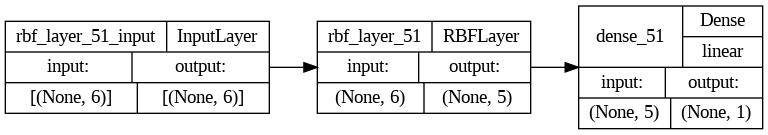

In [ ]:
#@title Imagen de la red del modelo
path_img_file = directory+"/image_redRBF.jpg"
tf.keras.utils.plot_model(loaded_modelRBF,
                          #to_file=path_img_file,
                          #dpi=96, # Determina el tamaño de la imagen y por ende, su calidad, por defecto en 96
                          rankdir='LR', # LR para horizontal. TR para vertical
                          #expand_nested=False,
                          #show_trainable=True,
                          show_shapes=True,
                          show_layer_names=True,
                          show_layer_activations=True
                          )

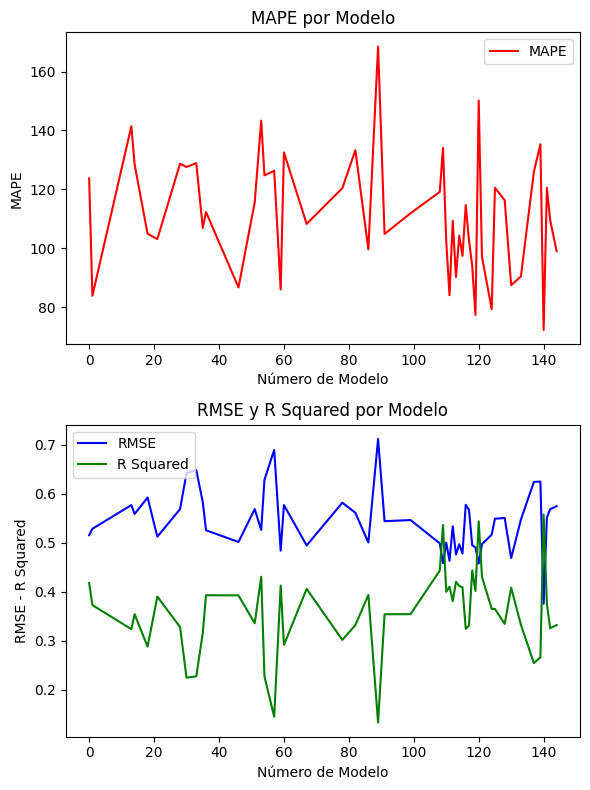

Modelo con el MAPE más bajo ->             value: 72.2350845336914 ;    model: modelo_0140
Modelo con el RMSE más bajo ->             value: 0.375047504901886 ;    model: modelo_0140
Modelo con el R Squared más cercano a 1 -> value: 0.5570481419563293 ;    model: modelo_0140


In [ ]:
#@title Comparativa de métricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos
df = pd.read_csv(directory+'/resultadosRBF_modelos_QS.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Primer gráfico para 'mape'
sns.lineplot(data=df, x='trial_id', y='mape', color='red', label='MAPE', ax=ax1)
ax1.set_title('MAPE por Modelo')
ax1.set_xlabel('Número de Modelo')
ax1.set_ylabel('MAPE')

# Segundo gráfico para 'rmse' y 'r_squared'
sns.lineplot(data=df, x='trial_id', y='rmse', color='blue', label='RMSE', ax=ax2)
sns.lineplot(data=df, x='trial_id', y='r_squared', color='green', label='R Squared', ax=ax2)
ax2.set_title('RMSE y R Squared por Modelo')
ax2.set_xlabel('Número de Modelo')
ax2.set_ylabel('RMSE - R Squared')
ax2.legend(loc='upper left')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Encontrar los modelos con los mejores valores
best_mape_model, mape_bestvalue = df.iloc[df['mape'].idxmin()]['model_name'], df.iloc[df['mape'].idxmin()]['mape']
best_rmse_model, rmse_bestvalue = df.iloc[df['rmse'].idxmin()]['model_name'], df.iloc[df['rmse'].idxmin()]['rmse']
best_rsquared_model, rsquared_bestvalue = df.iloc[(df['r_squared']-1).abs().idxmin()]['model_name'], df.iloc[(df['r_squared']-1).abs().idxmin()]['r_squared']

print(f"Modelo con el MAPE más bajo ->             value: {mape_bestvalue} ;    model: {best_mape_model}")
print(f"Modelo con el RMSE más bajo ->             value: {rmse_bestvalue} ;    model: {best_rmse_model}")
print(f"Modelo con el R Squared más cercano a 1 -> value: {rsquared_bestvalue} ;    model: {best_rsquared_model}")


In [ ]:
loss, mape, rmse_value, r_squared_value = loaded_modelRBF.evaluate(X_test, y_test)
print(f"""Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

Loss
RMSE Loss: 0.7929404398579618

Métricas del modelo
MAPE: 139.0373992919922
RMSE: 0.7929404377937317
R2:   -0.01768689975142479



## Pesos

In [ ]:
loaded_modelRBF.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_51 (RBFLayer)     (None, 5)                 30        
                                                                 
 dense_51 (Dense)            (None, 1)                 6         
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weights_RBFmodel = loaded_modelRBF.get_weights()
weights_RBFmodel

[array([[ 0.00805227, -0.04439519,  0.03981083,  0.04916571,  0.02049848],
        [-0.00102043,  0.04720313,  0.02020869, -0.00849568, -0.03886845],
        [ 0.04374974, -0.04469562, -0.0332013 , -0.04874716,  0.00127036],
        [-0.01968767,  0.02007507,  0.02264637, -0.00056276, -0.04797874],
        [-0.03278524,  0.01200814,  0.01892262,  0.03924607, -0.0439037 ],
        [-0.01924918, -0.03229712,  0.01199328,  0.00743758,  0.02492489]],
       dtype=float32),
 array([[ 0.24861908],
        [ 0.36389327],
        [-0.8324919 ],
        [-0.22833109],
        [-0.004884  ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
centros_RBF = weights_RBFmodel[0] # Cada fila son los centros de una neurona diferente
weights_capaSalida_RBF = weights_RBFmodel[1]
bias_capaSalida_RBF = weights_RBFmodel[2]
print(f"Centros RBF:\n{centros_RBF}")
print(f"\nPesos capa de salida:\n{weights_capaSalida_RBF}")
print(f"\nBias capa de salida:\n{bias_capaSalida_RBF}")

Centros RBF:
[[ 0.00805227 -0.04439519  0.03981083  0.04916571  0.02049848]
 [-0.00102043  0.04720313  0.02020869 -0.00849568 -0.03886845]
 [ 0.04374974 -0.04469562 -0.0332013  -0.04874716  0.00127036]
 [-0.01968767  0.02007507  0.02264637 -0.00056276 -0.04797874]
 [-0.03278524  0.01200814  0.01892262  0.03924607 -0.0439037 ]
 [-0.01924918 -0.03229712  0.01199328  0.00743758  0.02492489]]

Pesos capa de salida:
[[ 0.24861908]
 [ 0.36389327]
 [-0.8324919 ]
 [-0.22833109]
 [-0.004884  ]]

Bias capa de salida:
[0.]


## Validación

In [ ]:
early_stopping = callbacks.EarlyStopping(
            # early stopping ayuda a que un modelo no se entrene demasiado y gaste recursos de más
            monitor='val_loss', # Se detiene dependiendo del valor de la función de pérdida del set de validación
            patience=5 # El entrenamiento se detiene en caso de que en 5 iteraciones el modelo no mejore
            )

historial_RBF = loaded_modelRBF.fit(X_train,
                                    y_train,
                                    validation_data=(X_train,y_train),
                                    epochs=100,
                                    callbacks = [early_stopping]
                                    )

Train on 1847 samples, validate on 1847 samples
Epoch 1/100
1847/1847 [==============================] - 0s 170us/sample - loss: 0.7197 - mean_absolute_percentage_error: 107.2873 - rmse: 0.7197 - r_squared: 0.1124 - val_loss: 0.6193 - val_mean_absolute_percentage_error: 90.9538 - val_rmse: 0.6193 - val_r_squared: 0.2649
Epoch 2/100
1847/1847 [==============================] - 0s 89us/sample - loss: 0.5353 - mean_absolute_percentage_error: 88.0031 - rmse: 0.5353 - r_squared: 0.3592 - val_loss: 0.4962 - val_mean_absolute_percentage_error: 78.7264 - val_rmse: 0.4962 - val_r_squared: 0.3990
Epoch 3/100
1847/1847 [==============================] - 0s 88us/sample - loss: 0.4924 - mean_absolute_percentage_error: 79.5187 - rmse: 0.4924 - r_squared: 0.3911 - val_loss: 0.4863 - val_mean_absolute_percentage_error: 78.9949 - val_rmse: 0.4863 - val_r_squared: 0.4025
Epoch 4/100
1847/1847 [==============================] - 0s 91us/sample - loss: 0.4837 - mean_absolute_percentage_error: 80.5491 - rms

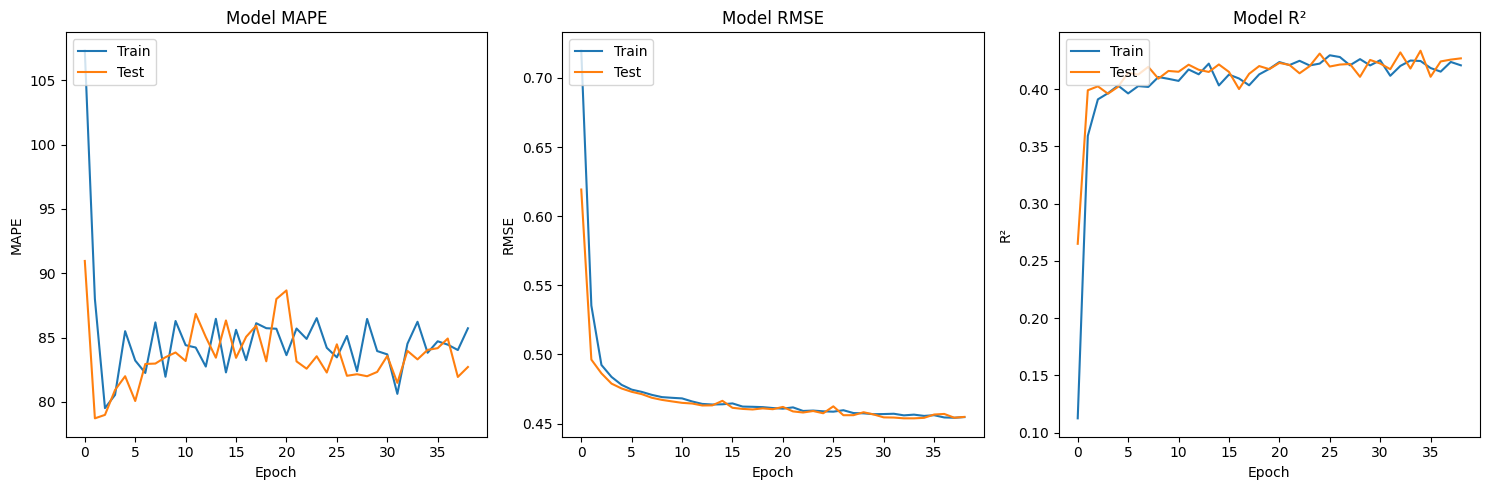

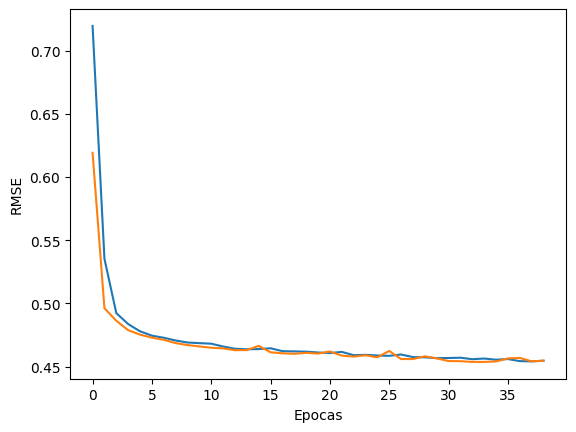

In [ ]:
#Evaluacion del modelo 1
loss, mape, rmse_value, r_squared_value = loaded_modelRBF.evaluate(X_test, y_test)

# Configurar el layout del subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas, tamaño total del plot

# Graficar MAPE
axs[0].plot(historial_RBF.history['mean_absolute_percentage_error'])
axs[0].plot(historial_RBF.history['val_mean_absolute_percentage_error'])
axs[0].set_title('Model MAPE')
axs[0].set_ylabel('MAPE')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Graficar RMSE
axs[1].plot(historial_RBF.history['rmse'])
axs[1].plot(historial_RBF.history['val_rmse'])
axs[1].set_title('Model RMSE')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Graficar R²
axs[2].plot(historial_RBF.history['r_squared'])
axs[2].plot(historial_RBF.history['val_r_squared'])
axs[2].set_title('Model R²')
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Epoch')
axs[2].legend(['Train', 'Test'], loc='upper left')

# Mostrar el plot
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------
plt.xlabel("Epocas")
plt.ylabel("RMSE")
plt.plot(historial_RBF.history['loss'], label="loss")
plt.plot(historial_RBF.history['val_loss'], label="val_loss")
plt.show()

Antes del Re-entrenamiento

Loss

RMSE Loss: 0.7929404398579618

<br>

Métricas del modelo
- MAPE: 139.0373992919922
- RMSE: 0.7929404377937317
- R2:   -0.01768689975142479


In [ ]:
print(f"""\tDespués del Re-entrenamiento
Loss
RMSE Loss: {loss}

Métricas del modelo
MAPE: {mape}
RMSE: {rmse_value}
R2:   {r_squared_value}
""")

	Después del Re-entrenamiento
Loss
RMSE Loss: 0.46868107987172675

Métricas del modelo
MAPE: 69.08305358886719
RMSE: 0.46868106722831726
R2:   0.4080831706523895



### Pesos luego del re-entrenamiento

In [ ]:
weights_RBFmodel_retrained = loaded_modelRBF.get_weights()
weights_RBFmodel_retrained

[array([[ 1.5175704 ,  1.7216085 , -0.94881684, -0.9614111 , -0.5721452 ],
        [ 1.6690152 ,  0.4993364 , -0.9106099 , -1.4830683 ,  0.4060449 ],
        [ 0.7643675 ,  0.86977553,  0.02928123,  0.12978645, -0.8841534 ],
        [ 1.0838538 ,  0.8344293 , -0.35095924, -0.2903223 , -0.5915176 ],
        [-0.47875863, -0.47826362, -0.41942245, -0.45425782, -0.46765038],
        [ 0.48819593,  0.48778278,  0.40547514,  0.45610112,  0.47399053]],
       dtype=float32),
 array([[ 1.7724056],
        [ 1.6093811],
        [-1.852785 ],
        [-1.3764069],
        [-1.6741464]], dtype=float32),
 array([-0.01480327], dtype=float32)]

In [ ]:
centros_RBF_retrained = weights_RBFmodel_retrained[0] # Cada fila son los centros de una neurona diferente
weights_capaSalida_retrained = weights_RBFmodel_retrained[1]
bias_capaSalida_retrained = weights_RBFmodel_retrained[2]
print(f"Centros RBF:\n{centros_RBF_retrained}")
print(f"\nPesos capa de salida:\n{weights_capaSalida_retrained}")
print(f"\nBias capa de salida:\n{bias_capaSalida_retrained}")

Centros RBF:
[[ 1.5175704   1.7216085  -0.94881684 -0.9614111  -0.5721452 ]
 [ 1.6690152   0.4993364  -0.9106099  -1.4830683   0.4060449 ]
 [ 0.7643675   0.86977553  0.02928123  0.12978645 -0.8841534 ]
 [ 1.0838538   0.8344293  -0.35095924 -0.2903223  -0.5915176 ]
 [-0.47875863 -0.47826362 -0.41942245 -0.45425782 -0.46765038]
 [ 0.48819593  0.48778278  0.40547514  0.45610112  0.47399053]]

Pesos capa de salida:
[[ 1.7724056]
 [ 1.6093811]
 [-1.852785 ]
 [-1.3764069]
 [-1.6741464]]

Bias capa de salida:
[-0.01480327]


In [ ]:
#@title Guardado de Re-entrenado
loaded_modelRBF.save(f'{directory}/{best_model_name}-retrained.h5') # GUARDAR modelo

print(f'\nCompile config:\n{loaded_modelRBF.get_config()}\n')
loaded_modelRBF.summary()


Compile config:
{'name': 'sequential_51', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 6), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rbf_layer_51_input'}, 'registered_name': None}, {'module': None, 'class_name': 'RBFLayer', 'config': {'name': 'rbf_layer_51', 'trainable': True, 'batch_input_shape': (None, 6), 'dtype': 'float32', 'units': 5, 'gamma': 0.6000000238418579}, 'registered_name': 'RBFLayer', 'build_config': {'input_shape': (None, 6)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_51', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regulari

# Comparativa


| Column 1 | LinearRegressor | MLP | MLP Re-trained | RBF | RBF Re-trained |
|----------|----------|------------|------------|------------|-----------|
| MAPE     |  2.0037  |  388.7506 |  209.3391  |  139.0374  |  69.0831  |
| RMSE     |   0.9276  |    1.3685  |   0.7171  |    0.7929  |   0.4687  |
| R2       |   0.1668  |   -2.0692  |   0.0945  |   -0.0177  |   0.4081  |

